In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
pip install pycaret

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 12.8 MB/s eta 0:00:00


In [ ]:
!pip install boostaroota

# Описание проекта: Мультимодальная модель для прогнозирования лесных пожаров

## Цель работы
Создание **мультимодальной модели** для предсказания лесных и природных пожаров на основе:
- Погодных данных (суточные метеорологические показатели)
- Спутниковых данных

---

## Источники данных
1. **Исходный датасет**  
   - Взят с сайта: [https://data.rcsi.science/data-catalog/datasets/202/](https://data.rcsi.science/data-catalog/datasets/202/)  
   - Содержал:  
     - Даты пожаров  
     - Координаты (широта/долгота)  
     - Тип пожара (например, "Лесной", "Природный")  
     - Код типа пожара  

2. **Погодные данные**  
   - Получены через API сервиса [Open-Meteo](https://open-meteo.com)  
   - Использованы **все доступные дневные метеопараметры** из документации API  

---

## Этапы подготовки данных
1. **Фильтрация исходного датасета**  
   - Отобрано **12 000 записей** природных пожаров из разных лет (для балансировки по времени).  
   - Учтено разнообразие годов, чтобы избежать перекоса в данных.

2. **Добавление погодных признаков**  
   - Для каждого "пожарного" дня через API были запрошены:  
     - Температура (макс/мин/средняя)  
     - Осадки, влажность, скорость ветра и др.  
   - Сформированы столбцы с погодными характеристиками.

3. **Генерация "непожарных" дней**  
   Алгоритм отбора контрольных дней:  
   - Для каждого пожара добавлено **3 типа "непожарных" дней**:  
     1. **До пожара**: случайный день за 3–10 суток до события.  
     2. **После пожара**: случайный день за 3–10 суток после.  
     3. **Случайный день**: вне связи с пожаром.
   - Все дни добавлялись с проверкой на отсутствие в уже существующих данных
   - Погодные данные для этих дней также получены через API.

4. **Итоговый датасет**  
   - Общий объем: **43 875 строк**  

# 1. Информация о датасете

Данный датасет содержит информацию о лесных пожарах и связанных с ними погодных условиях. Данные включают метеорологические показатели до, во время и после пожаров, а также случайные безопасные дни (без пожаров) для сравнения.

## 2. Описание столбцов

Часть столбцов являются временными и были созданы на этапе формирования  финального датасета

### Погодные показатели

| Название признака                     | Описание                                                                 |
|---------------------------------------|--------------------------------------------------------------------------|
| `temperature_2m_max`                  | Максимальная температура воздуха на высоте 2 метра (°C)                 |
| `temperature_2m_min`                  | Минимальная температура воздуха на высоте 2 метра (°C)                  |
| `temperature_2m_mean`                 | Средняя температура воздуха на высоте 2 метра (°C)                      |
| `apparent_temperature_max`            | Максимальная ощущаемая температура (°C)                                 |
| `apparent_temperature_min`            | Минимальная ощущаемая температура (°C)                                  |
| `apparent_temperature_mean`           | Средняя ощущаемая температура (°C)                                      |
| `precipitation_sum`                   | Суммарное количество осадков (мм)                                       |
| `rain_sum`                            | Количество дождя (мм)                                                   |
| `snowfall_sum`                        | Количество снега (мм)                                                   |
| `precipitation_hours`                 | Продолжительность осадков (часы)                                        |
| `relative_humidity_2m_max`            | Максимальная относительная влажность (%)                                |
| `relative_humidity_2m_min`            | Минимальная относительная влажность (%)                                 |
| `relative_humidity_2m_mean`           | Средняя относительная влажность (%)                                     |
| `dew_point_2m_max`                    | Максимальная точка росы (°C)                                            |
| `dew_point_2m_min`                    | Минимальная точка росы (°C)                                             |
| `dew_point_2m_mean`                   | Средняя точка росы (°C)                                                 |
| `wind_speed_10m_max`                  | Максимальная скорость ветра (км/ч)                                      |
| `wind_speed_10m_min`                  | Минимальная скорость ветра (км/ч)                                       |
| `wind_speed_10m_mean`                 | Средняя скорость ветра (км/ч)                                           |
| `wind_gusts_10m_max`                  | Максимальные порывы ветра (км/ч)                                        |
| `wind_gusts_10m_mean`                 | Средние порывы ветра (км/ч)                                             |
| `wind_direction_10m_dominant`         | Преобладающее направление ветра (градусы)                               |
| `sunrise`                             | Время восхода солнца (UTC)                                              |
| `sunset`                              | Время заката солнца (UTC)                                               |
| `sunshine_duration`                   | Продолжительность солнечного сияния (секунды)                           |
| `daylight_duration`                   | Продолжительность светового дня (секунды)                               |
| `shortwave_radiation_sum`             | Сумма прямого и диффузного солнечного излучения (МДж/м²)                |
| `pressure_msl_max`                    | Максимальное давление на уровне моря (гПа)                              |
| `pressure_msl_min`                    | Минимальное давление на уровне моря (гПа)                               |
| `pressure_msl_mean`                   | Среднее давление на уровне моря (гПа)                                   |
| `weather_code`                        | Код погодных условий                                           |
| `et0_fao_evapotranspiration`          | Потенциальная эвапотранспирация (мм)                                    |

### Информация о пожарах

| Название признака                     | Описание                                                                 |
|---------------------------------------|--------------------------------------------------------------------------|
| `type_name`                           | Название типа пожара (например "Лесной пожар")                          |
| `type_id`                             | Идентификатор типа пожара                                                |
| `year`                                | Год возникновения пожара                                                 |
| `date`                                | Дата пожара (YYYY-MM-DD)                                                 |
| `lat`                                 | Географическая широта                                                    |
| `lon`                                 | Географическая долгота                                                   |
| `label`                               | Метка события (1 - пожар, 0 - нет пожара)                                |
| `type`                                | Тип дня относительно пожара ("fire", "post_fire_*", "pre_fire_*", "random_safe") |

### Временные столбцы (подлежат удалению)

### index, lat_x, lon_x, dt_x, lon_y, lat_y, dt_y, lat_group, lon_group, group_id

Также рассматривая данную задачу, удалению подлежат следующие столбцы:
  - type_name (тип пожара не важен, в датасете есть только природные естественного возникновения)
  - type_id (код пожара, который также указывает на тип пожара)
  - Столбец type также нужно удалить, так как он указывает прямо на наличие/отсутствие пожара, что привело бы к утечке, но было решено его оставить для информативности дней, но при обучении он будет исключен из числа признаков

In [ ]:
df = pd.read_csv('df_full43875k.csv', sep=',', index_col=0)#
df = df.drop(columns=['index', 'lat_x', 'lon_x', 'dt_x', 'dt_y', 'lat_y', 'lon_y', 'lat_group', 'lon_group', 'group_id', 'type_name', 'type_id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43875 entries, 0 to 43874
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_2m_max           43875 non-null  float64
 1   temperature_2m_min           43875 non-null  float64
 2   temperature_2m_mean          43875 non-null  float64
 3   apparent_temperature_max     43875 non-null  float64
 4   apparent_temperature_min     43875 non-null  float64
 5   apparent_temperature_mean    43875 non-null  float64
 6   precipitation_sum            43875 non-null  float64
 7   rain_sum                     43875 non-null  float64
 8   snowfall_sum                 43875 non-null  float64
 9   precipitation_hours          43875 non-null  float64
 10  relative_humidity_2m_max     43875 non-null  float64
 11  relative_humidity_2m_min     43875 non-null  float64
 12  relative_humidity_2m_mean    43875 non-null  float64
 13  dew_point_2m_max     

In [ ]:
df.isna().sum()

temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
relative_humidity_2m_max       0
relative_humidity_2m_min       0
relative_humidity_2m_mean      0
dew_point_2m_max               0
dew_point_2m_min               0
dew_point_2m_mean              0
wind_speed_10m_max             0
wind_speed_10m_min             0
wind_speed_10m_mean            0
wind_gusts_10m_max             0
wind_gusts_10m_mean            0
wind_direction_10m_dominant    0
sunrise                        0
sunset                         0
sunshine_duration              0
daylight_duration              0
shortwave_radiation_sum        0
pressure_msl_max               0
pressure_msl_min               0
pressure_msl_mean              0
weather_code                   0
et0_fao_evapotranspiration     0
year                           0
date                           0
lat                            0
lon                            0
label                          0
type                           0
dtype: int64

In [ ]:
df.describe().T

count          mean           std        min  \
temperature_2m_max           43875.0     11.487259     16.960748   -51.8000   
temperature_2m_min           43875.0      1.464937     15.380341   -56.0000   
temperature_2m_mean          43875.0      6.605835     16.208397   -53.5000   
apparent_temperature_max     43875.0      8.684670     18.537369   -56.3000   
apparent_temperature_min     43875.0     -1.533953     16.933123   -61.0000   
apparent_temperature_mean    43875.0      3.794126     17.841065   -58.6000   
precipitation_sum            43875.0      0.827307      2.546010     0.0000   
rain_sum                     43875.0      0.674432      2.412966     0.0000   
snowfall_sum                 43875.0      0.121289      0.594299     0.0000   
precipitation_hours          43875.0      2.003624      4.128123     0.0000   
relative_humidity_2m_max     43875.0     81.044467     13.082751    22.0000   
relative_humidity_2m_min     43875.0     44.246427     17.249463     6.0000   
relative_humidity_2m_mean    43875.0     62.436832     14.498498    16.0000   
dew_point_2m_max             43875.0      1.973162     14.568150   -55.8000   
dew_point_2m_min             43875.0     -3.767034     14.910735   -59.5000   
dew_point_2m_mean            43875.0     -1.066498     14.609978   -57.5000   
wind_speed_10m_max           43875.0     14.398227      5.617184     1.1000   
wind_speed_10m_min           43875.0      5.253208      3.807922     0.0000   
wind_speed_10m_mean          43875.0      9.795907      4.403007     0.5000   
wind_gusts_10m_max           43875.0     32.627123     11.938136     4.3000   
wind_gusts_10m_mean          43875.0     22.403227      8.692934     3.0000   
wind_direction_10m_dominant  43875.0    187.024274    106.512853     0.0000   
sunshine_duration            43875.0  38146.802629  18906.794971     0.0000   
daylight_duration            43875.0  53003.007593  15968.373794     0.0000   
shortwave_radiation_sum      43875.0     15.726855      8.282086     0.0000   
pressure_msl_max             43875.0   1015.865632      9.189182   982.8000   
pressure_msl_min             43875.0   1010.731223      9.189992   962.5000   
pressure_msl_mean            43875.0   1013.312005      9.117866   977.3000   
weather_code                 43875.0     22.629174     27.851124     0.0000   
et0_fao_evapotranspiration   43875.0      2.859399      1.908388     0.0000   
year                         43875.0   2017.301288      2.903511  2012.0000   
lat                          43875.0     58.731418      6.037470    41.2628   
lon                          43875.0    112.449674     28.911090    20.3137   
label                        43875.0      0.273026      0.445519     0.0000   

                                    25%         50%         75%         max  
temperature_2m_max               3.6000     16.9000     24.0000     40.8000  
temperature_2m_min              -4.4000      6.6000     12.8000     27.8000  
temperature_2m_mean             -0.4000     11.9000     18.7000     32.9000  
apparent_temperature_max        -1.1000     14.3000     22.8000     41.9000  
apparent_temperature_min        -9.1000      3.6000     11.4000     27.0000  
apparent_temperature_mean       -5.0000      9.1000     17.6000     33.5000  
precipitation_sum                0.0000      0.0000      0.3000     69.7000  
rain_sum                         0.0000      0.0000      0.1000     69.7000  
snowfall_sum                     0.0000      0.0000      0.0000     18.6200  
precipitation_hours              0.0000      0.0000      2.0000     24.0000  
relative_humidity_2m_max        73.0000     82.0000     91.0000    100.0000  
relative_humidity_2m_min        31.0000     41.0000     56.0000    100.0000  
relative_humidity_2m_mean       52.0000     63.0000     73.0000    100.0000  
dew_point_2m_max                -5.1000      6.7000     12.9000     25.3000  
dew_point_2m_min               -11.5000      1.4000      7.4000     21.5000  
dew_point_2m_mean

In [ ]:
def plot_feature_scatter(df: pd.DataFrame, target: str, sample_size: int = 1000):
    if len(df) > sample_size:
        df = df.sample(sample_size, random_state=42)

    numeric_features = df.select_dtypes(include='number').columns.drop(target, errors='ignore')

    n_features = len(numeric_features)
    ncols = 3
    nrows = (n_features + ncols - 1) // ncols

    plt.figure(figsize=(5 * ncols, 4 * nrows))
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(nrows, ncols, i)
        sns.scatterplot(x=df[feature], y=df[target])
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
    plt.tight_layout()
    plt.show()

Строим диаграммы рассеяния для графического представления связи между признаками и целевой переменной.

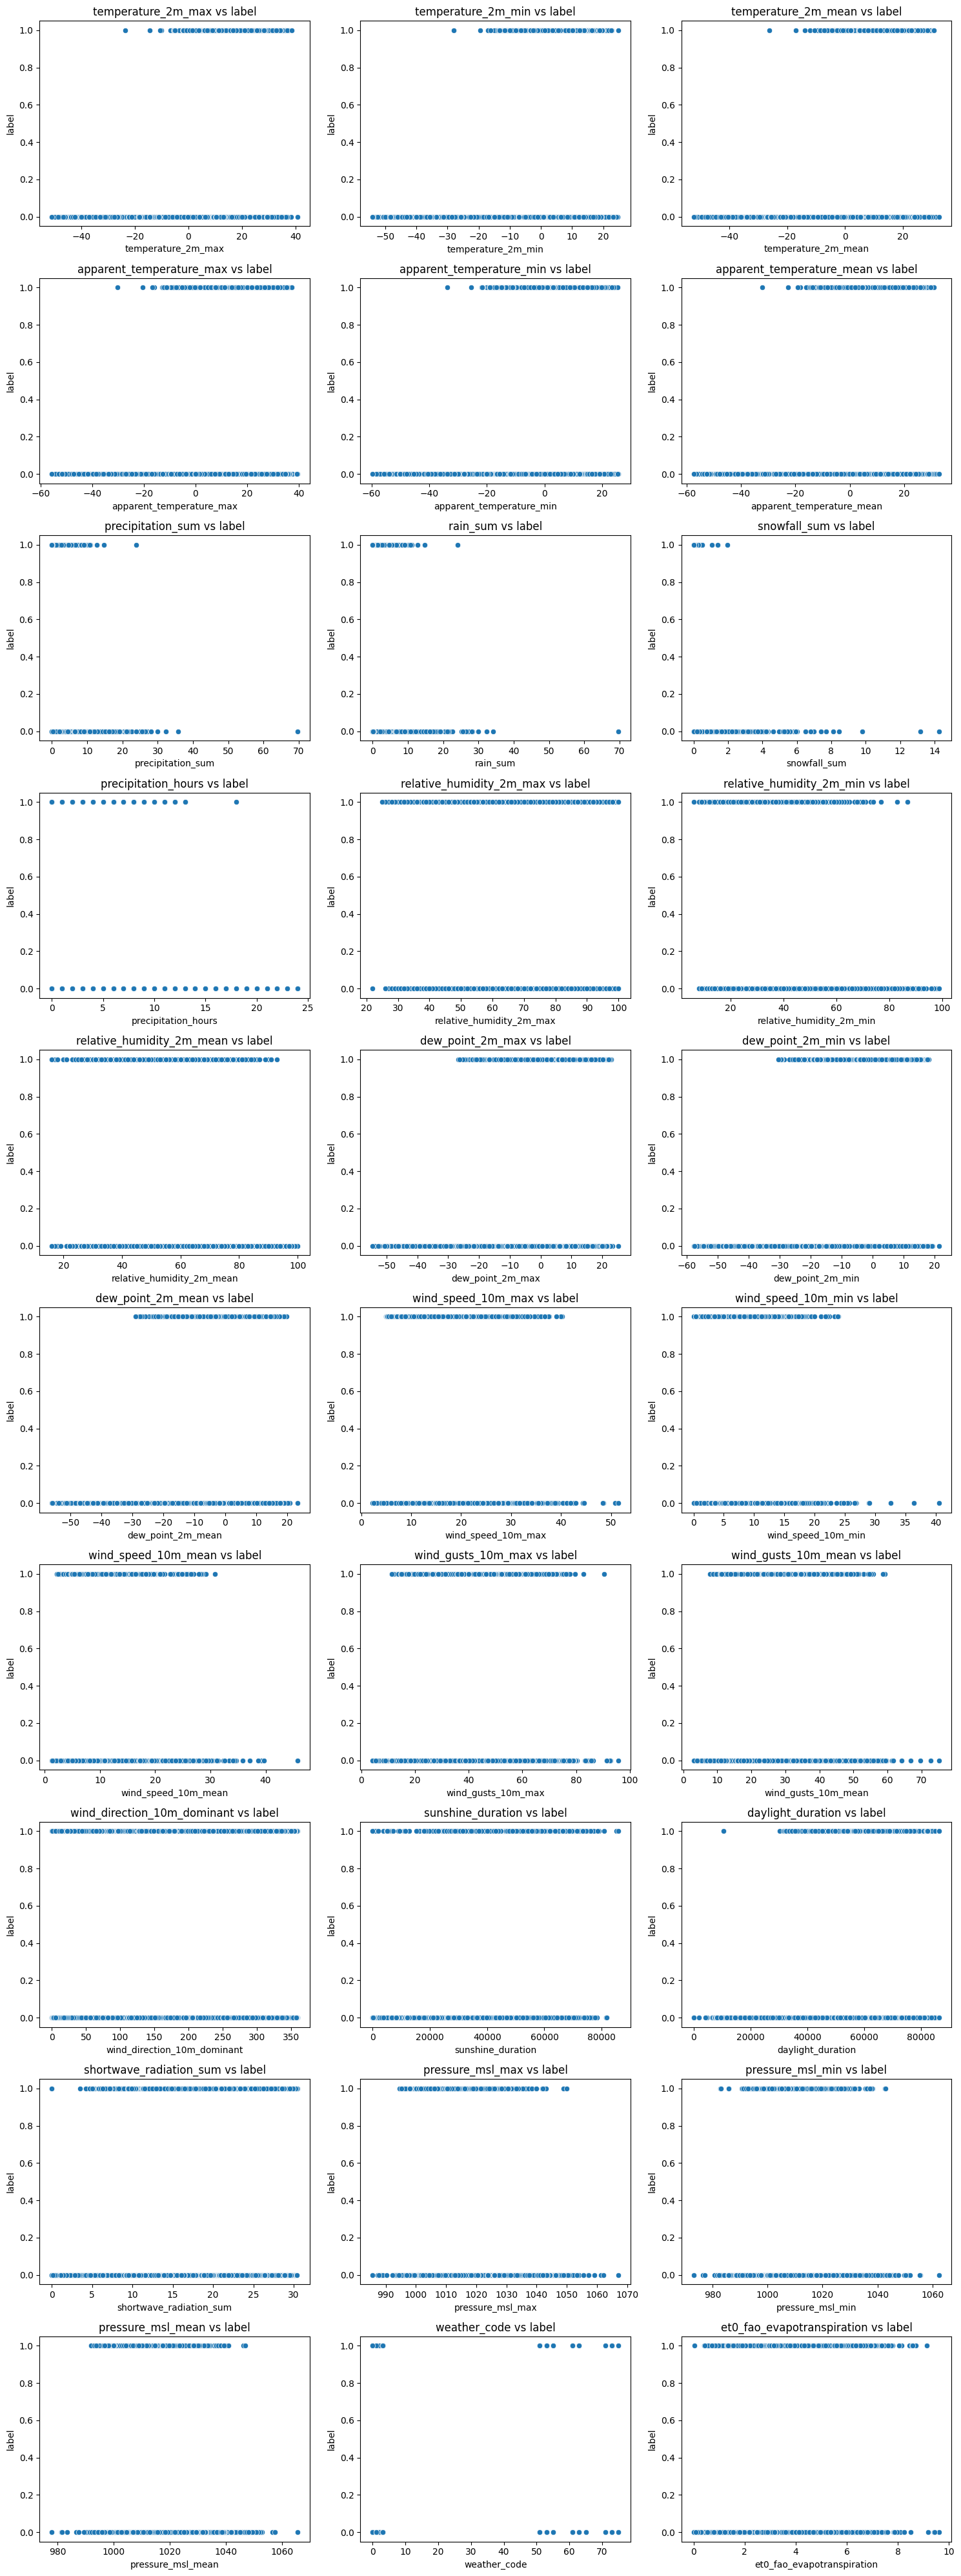

In [ ]:
plot_feature_scatter(df.drop(['sunrise', 'sunset', 'date', 'lat', 'lon','type', 'year'], axis=1), 'label', 10000)

# Выделение аномалий
На основе характеристик, полученных с помощью describe(), были проанализированы диапазоны значений для ключевых метеорологических переменных. Особое внимание уделялось минимумам и максимумам, которые могли бы выходить за пределы физически допустимых значений.

##Температурные показатели
- Минимальные значения температуры (temperature_2m_min, apparent_temperature_min) достигают около -56°C, а максимальные — до +41°C.
- Хотя такие экстремумы выглядят необычно в глобальном масштабе, но они не считаются аномалией в данном контексте, так как данные охватывают регионы с суровыми климатическими условиями (районы Сибири и Крайнего Севера).
- Таким образом, температурные значения допустимы с точки зрения физического смысла и географического охвата датасета.

##Порывы ветра (wind_gusts_10m_max)

Скорость ветра (wind_speed) отражает устойчивое движение воздуха, тогда как порывы (wind_gusts) — это кратковременные резкие усиления ветра, критичные для распространения пожара. Оба типа характеристик важны: один — для прогноза общего поведения, второй — для риска внезапных вспышек. В данном случае мы рассмотрим аномалии порывов ветра.

- Максимальное зарегистрированное значение порывов ветра составляет 130.7 км/ч, что значительно превышает пороги, наблюдаемые даже при самых мощных ураганах и торнадо.
- Ураганы достигают порывов около 70–90 км/ч, а торнадо — до 120 км/ч, такие значения редки и фиксируются специализированными измерениями.
- Столь высокие значения выглядят маловероятными и с большой долей вероятности являются аномалиями в данном контексте.
- Необходимо удаление всех строк со значения wind_gusts_10m_max > 80 км/ч

##Осадки
- precipitation_sum = 69.7 мм и rain_sum = 69.7 мм в сутки - такие значения характерны тропическим зонам, ограничиваем до 50

##Световой день
- daylight_duration = 0.0 и sunshine_duration = 0.0 - на первый взгляд аномальные значения, но при просмотре строк с такими показателями видно, что это зоны на Крайнем Севере зимой с соответствующей погодой (низкие температуры и тд), оставляем столбец без изменений



In [ ]:
df = df[df['wind_gusts_10m_max'] <= 70]
df = df[(df['precipitation_sum'] < 50) | (df['rain_sum'] < 50)]

In [ ]:
df.columns

Index(['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'apparent_temperature_mean', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'relative_humidity_2m_max',
       'relative_humidity_2m_min', 'relative_humidity_2m_mean',
       'dew_point_2m_max', 'dew_point_2m_min', 'dew_point_2m_mean',
       'wind_speed_10m_max', 'wind_speed_10m_min', 'wind_speed_10m_mean',
       'wind_gusts_10m_max', 'wind_gusts_10m_mean',
       'wind_direction_10m_dominant', 'sunrise', 'sunset', 'sunshine_duration',
       'daylight_duration', 'shortwave_radiation_sum', 'pressure_msl_max',
       'pressure_msl_min', 'pressure_msl_mean', 'weather_code',
       'et0_fao_evapotranspiration', 'year', 'date', 'lat', 'lon', 'label',
       'type'],
      dtype='object')

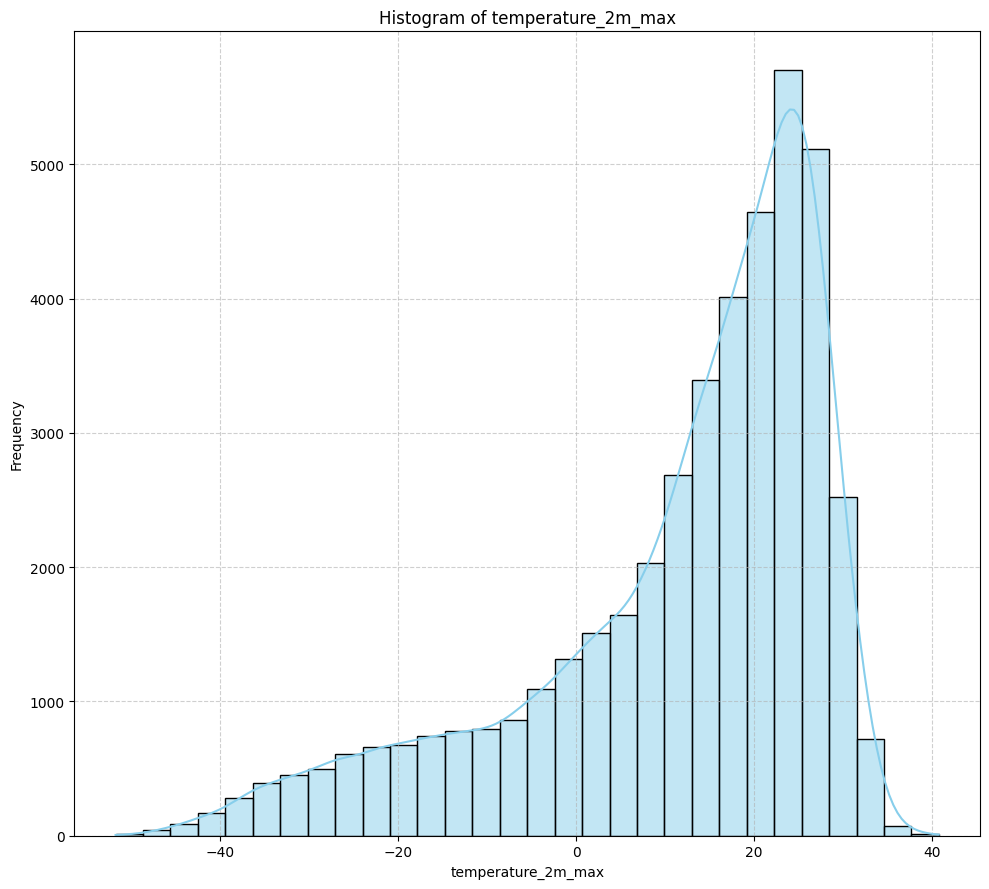

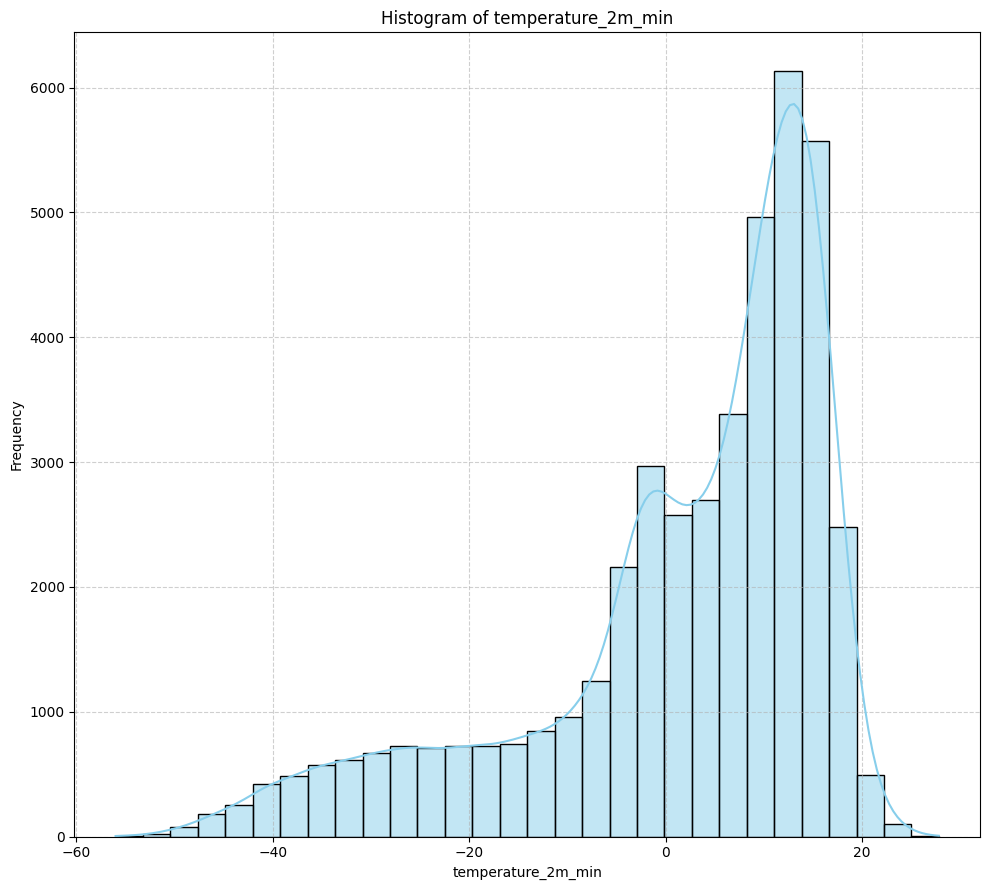

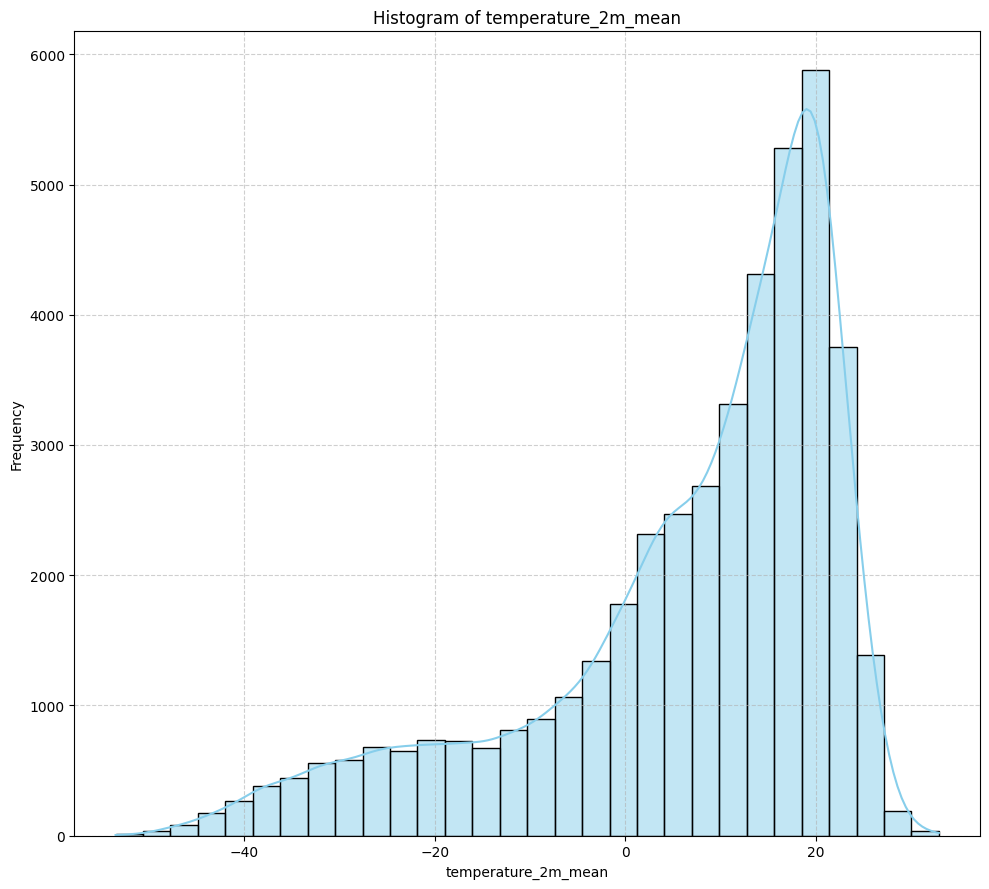

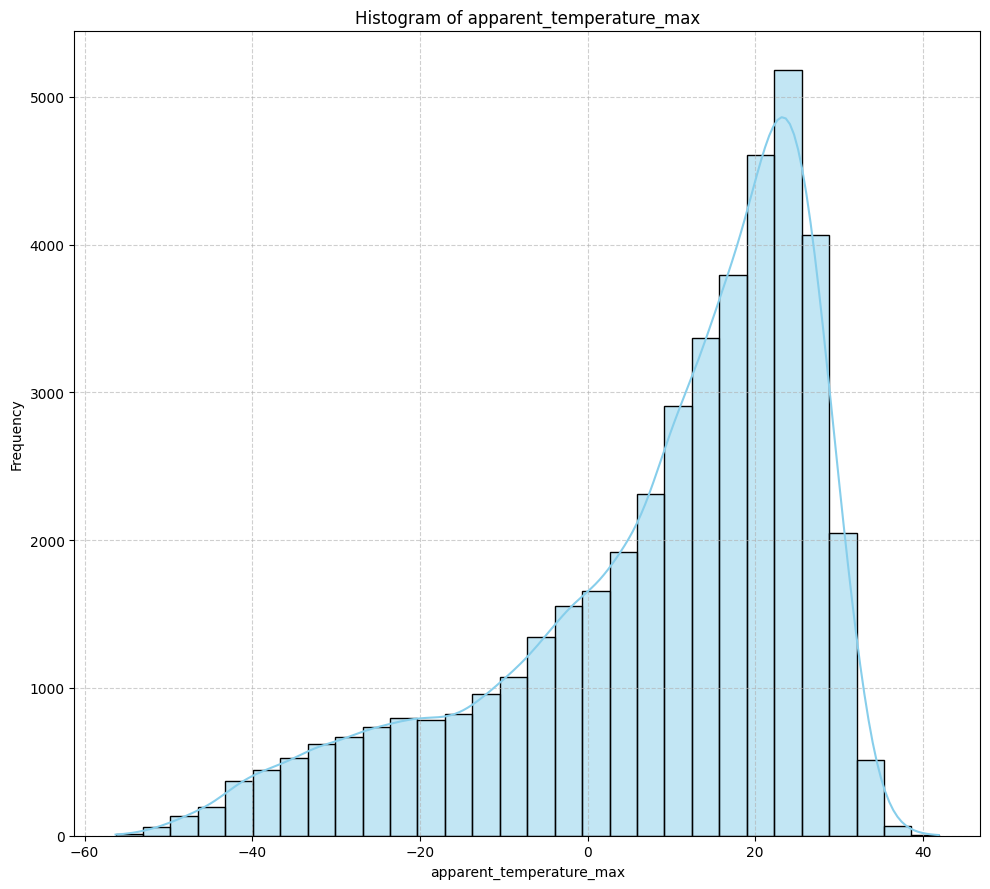

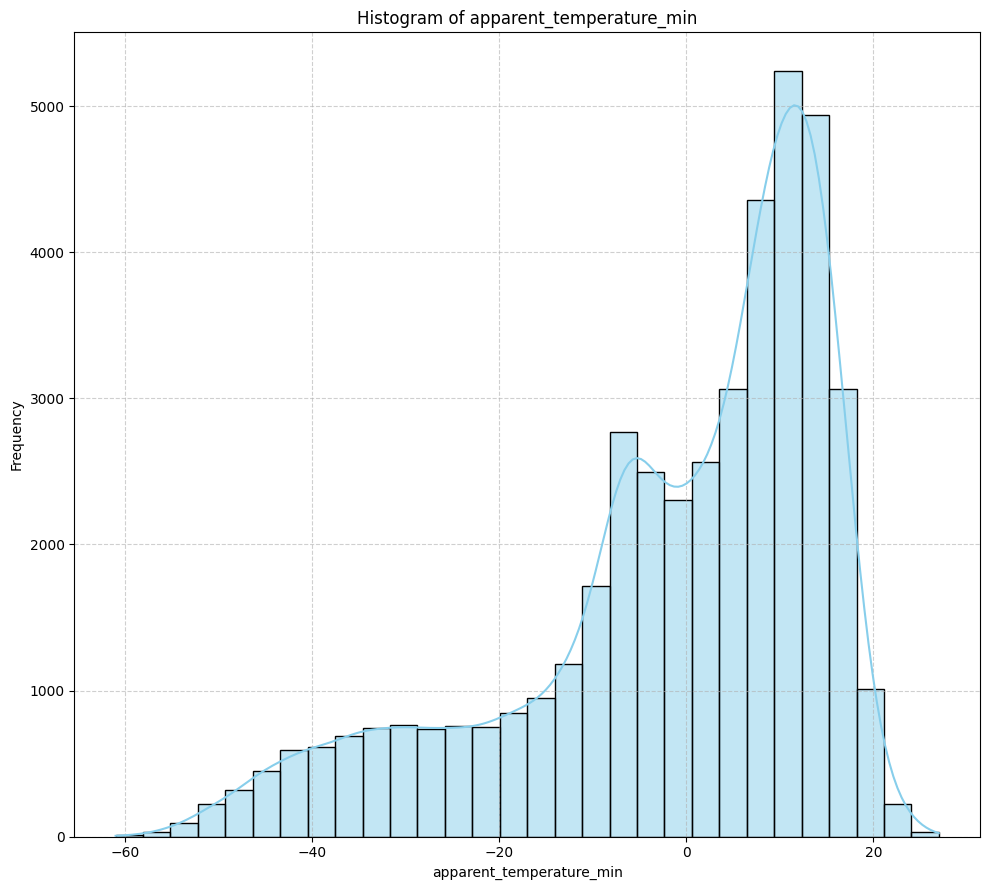

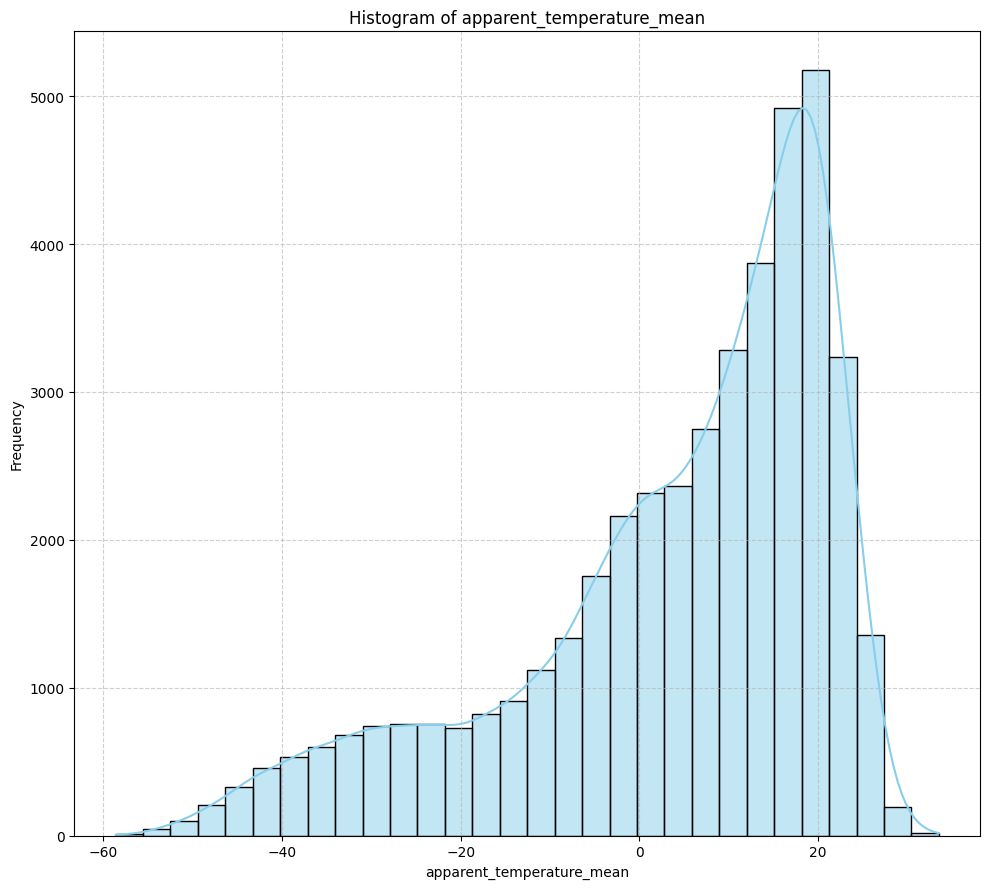

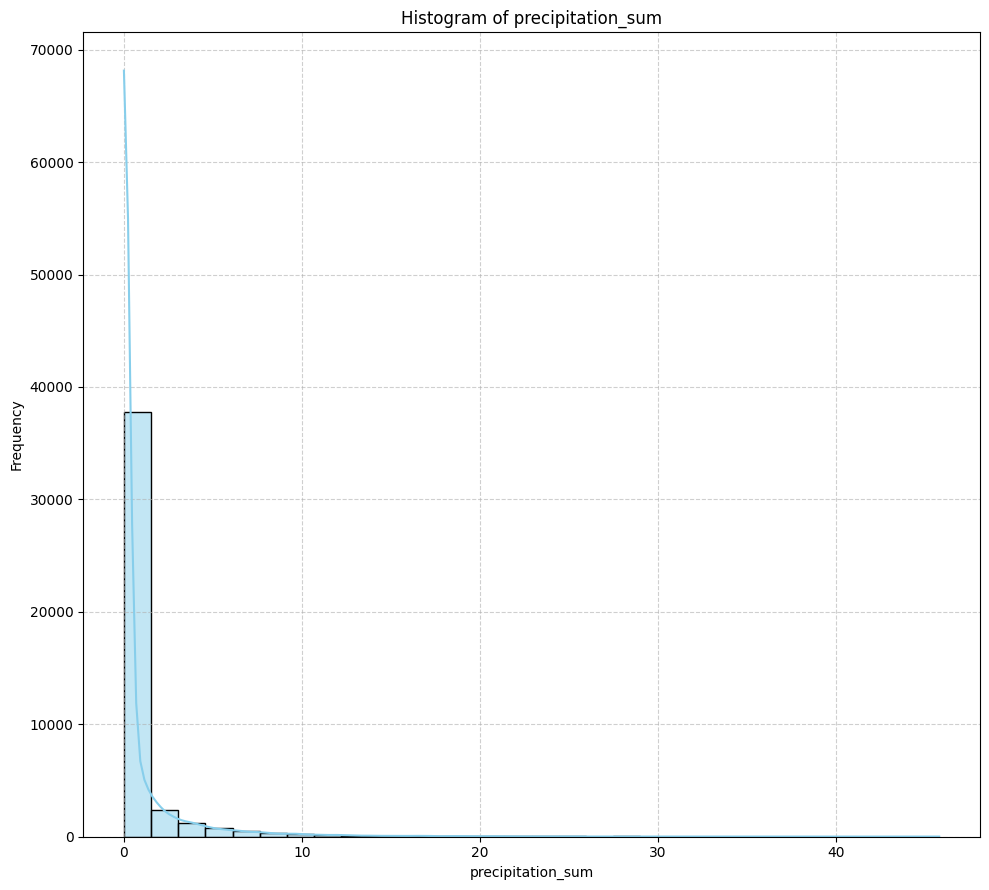

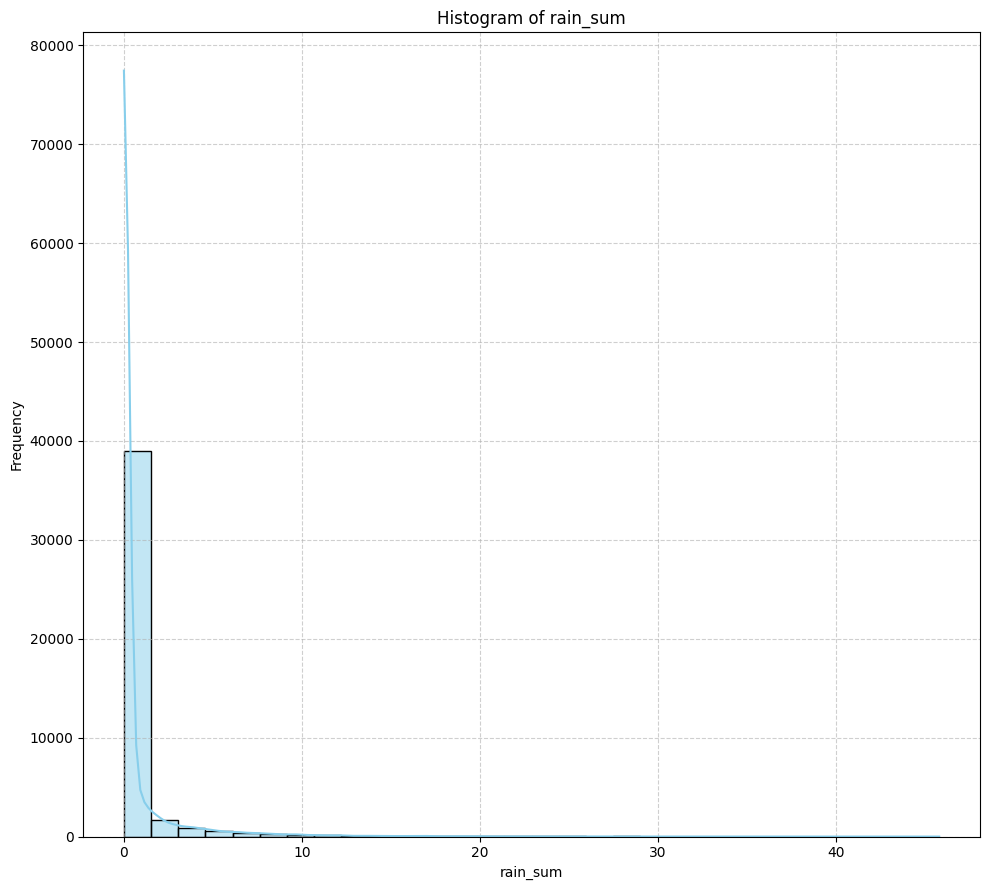

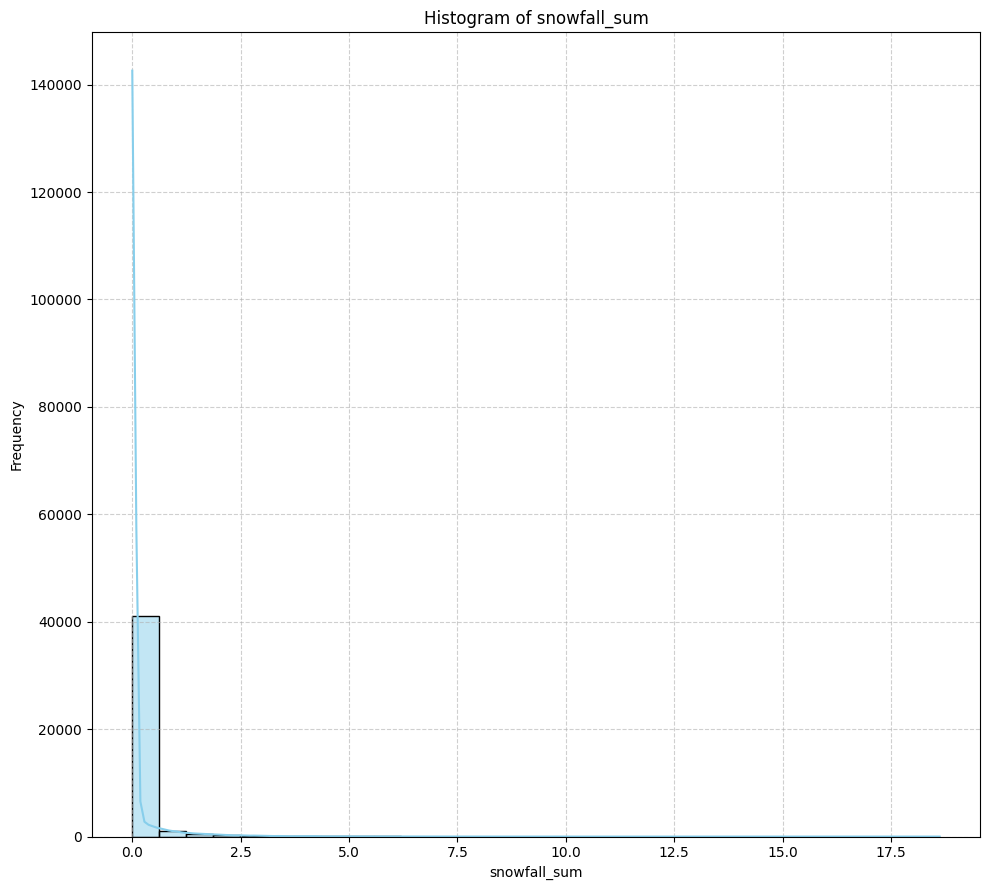

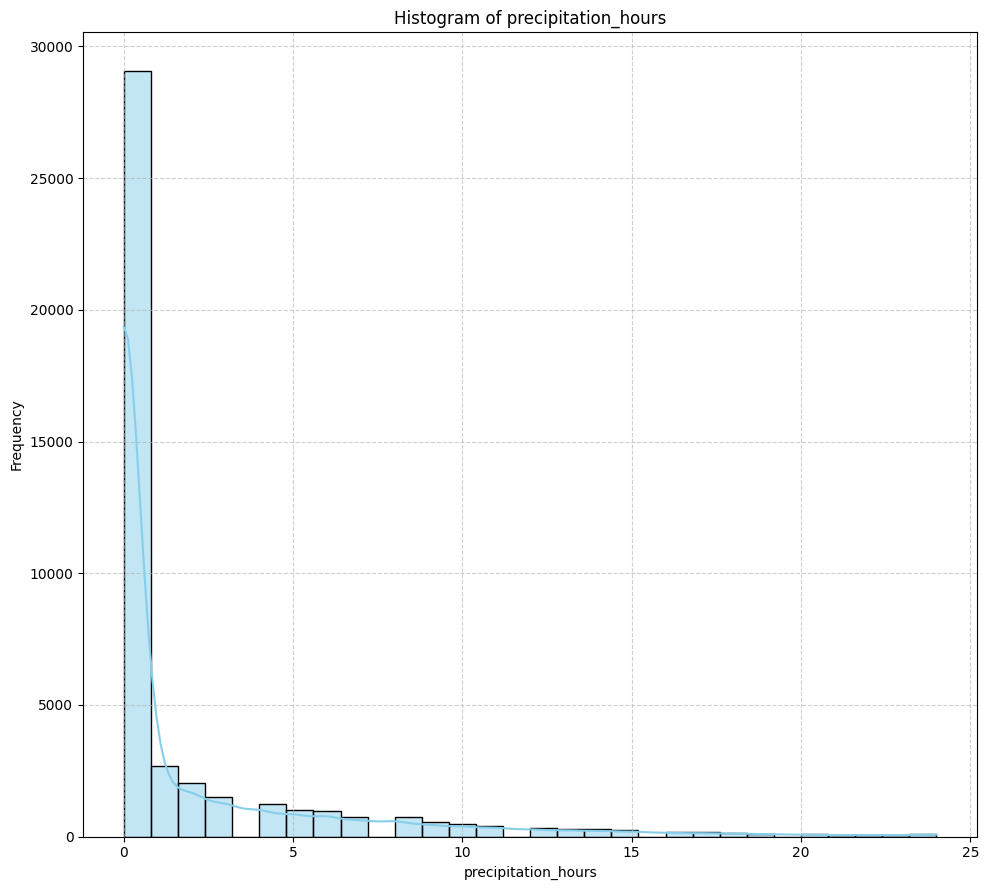

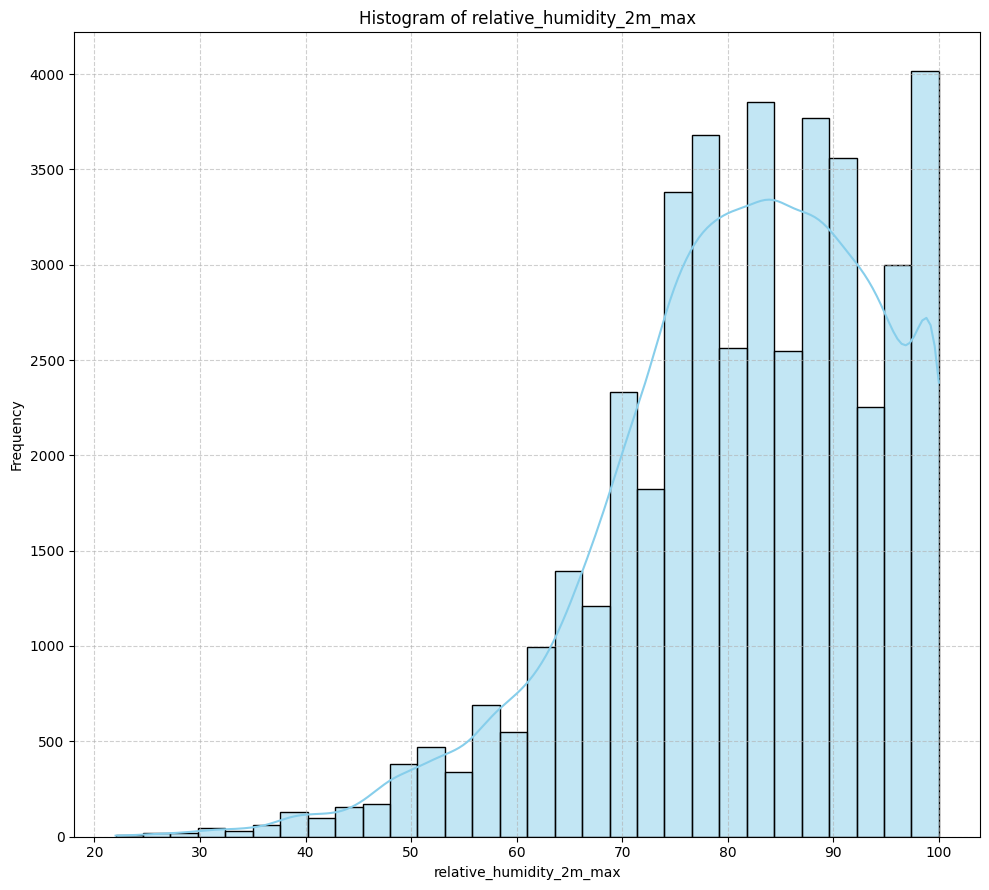

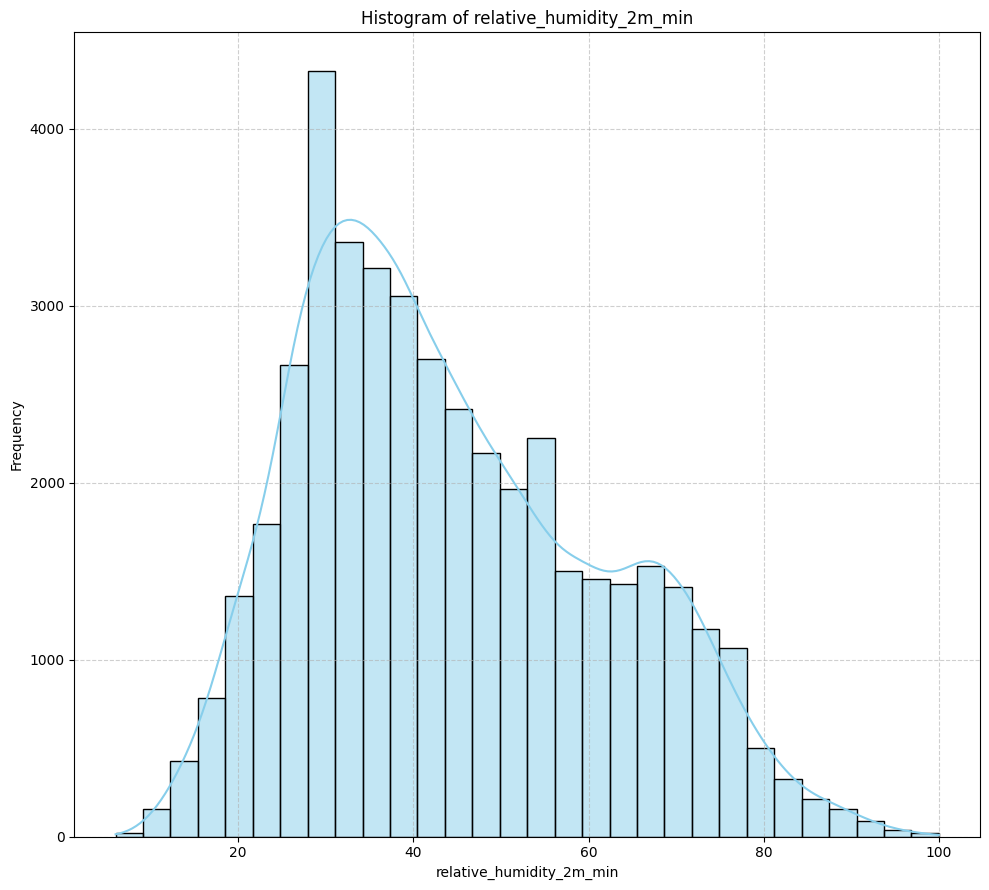

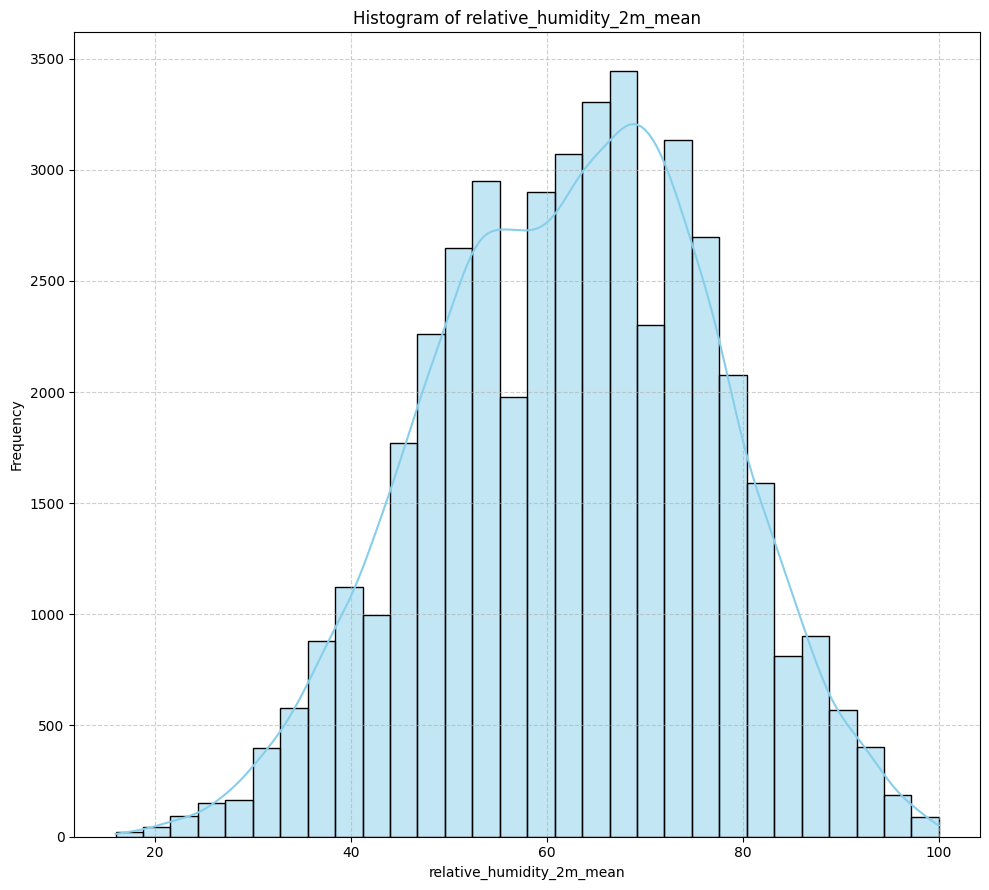

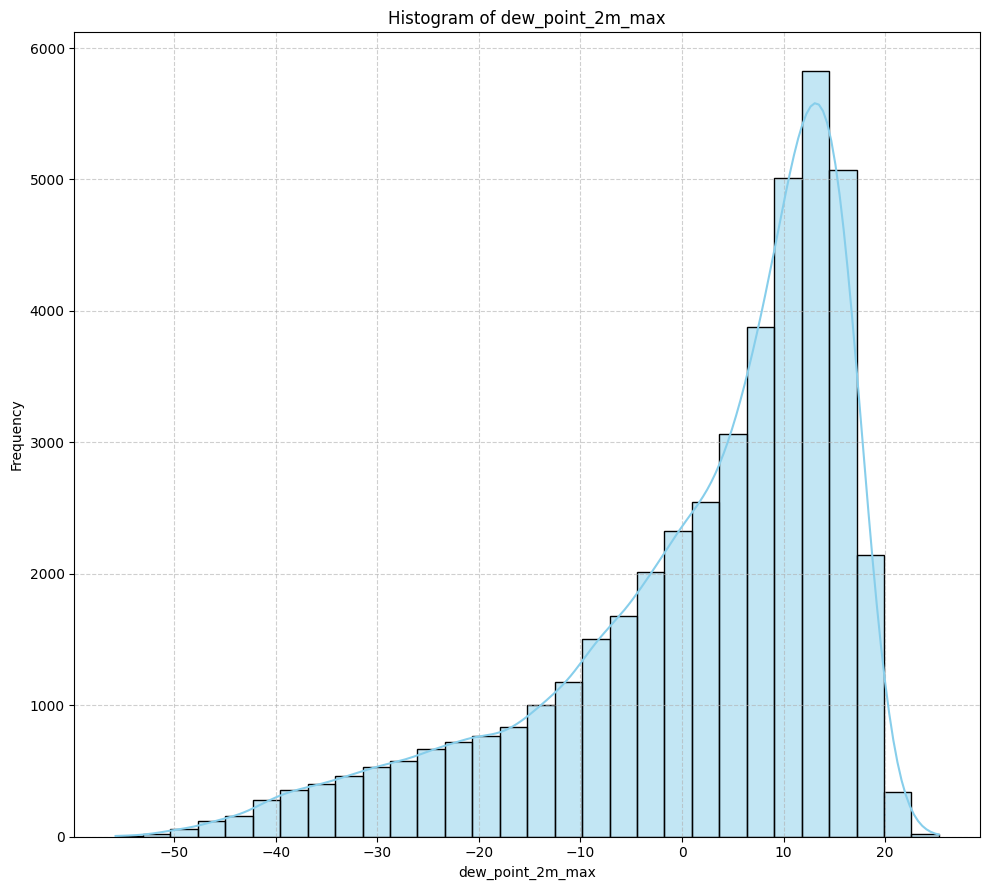

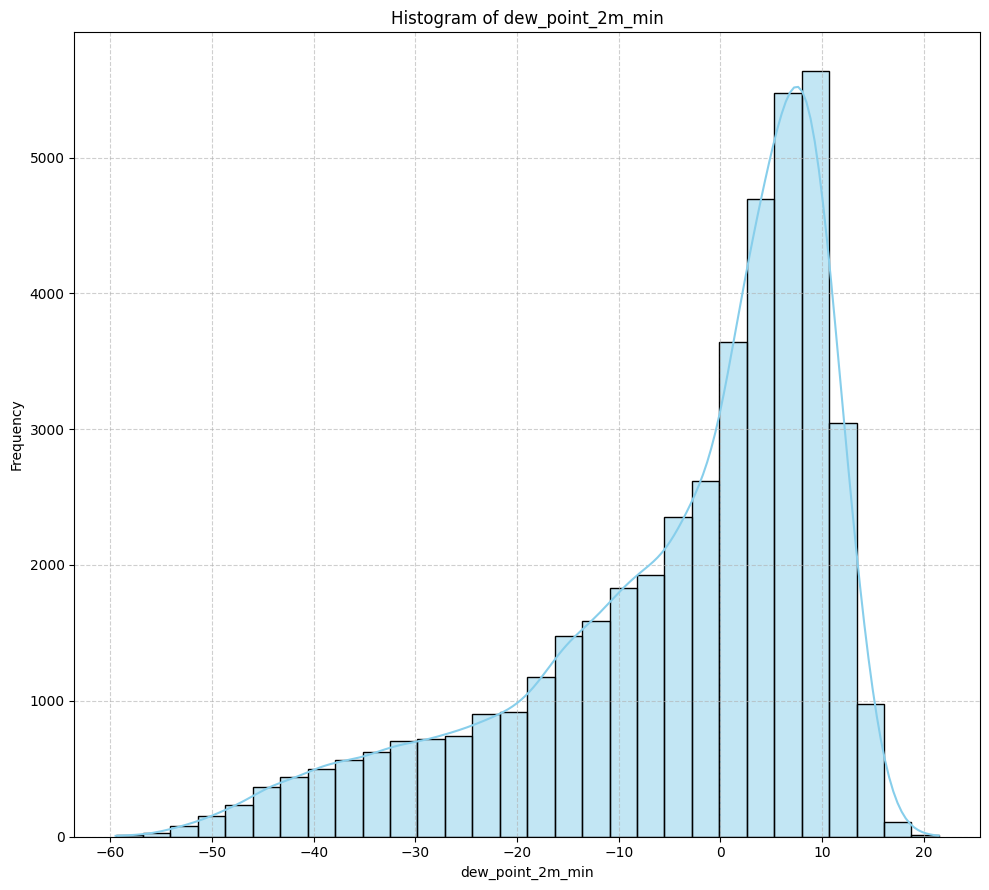

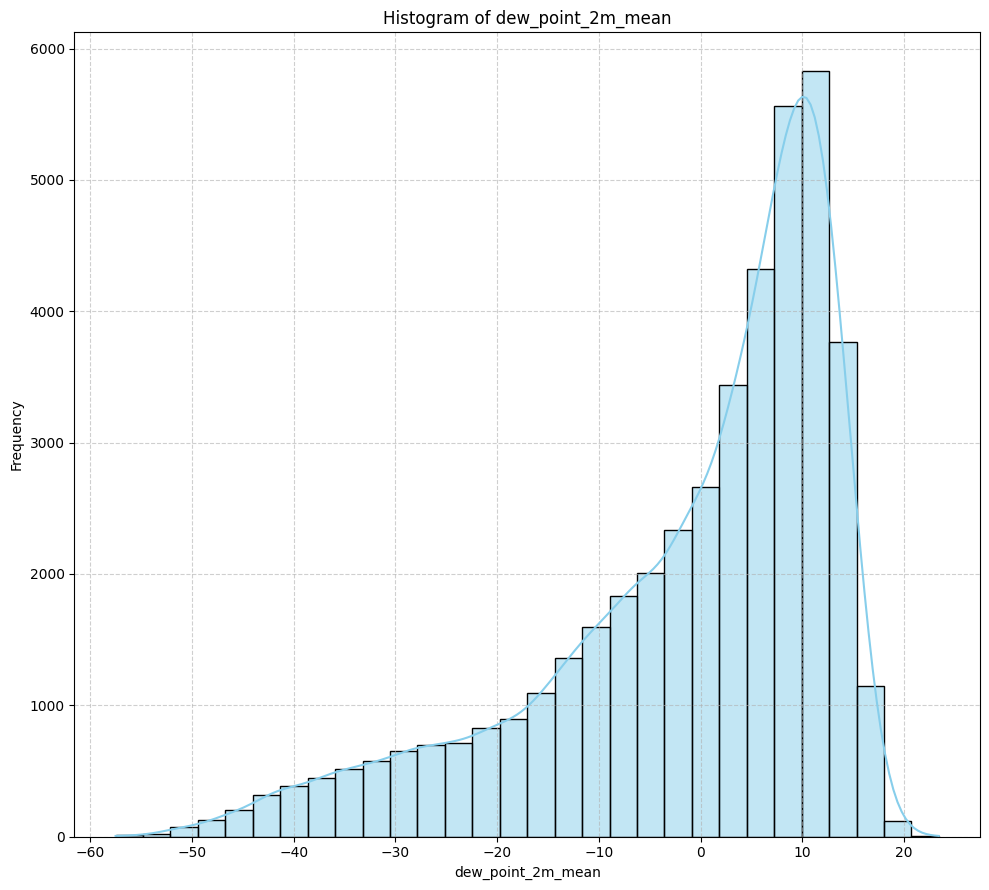

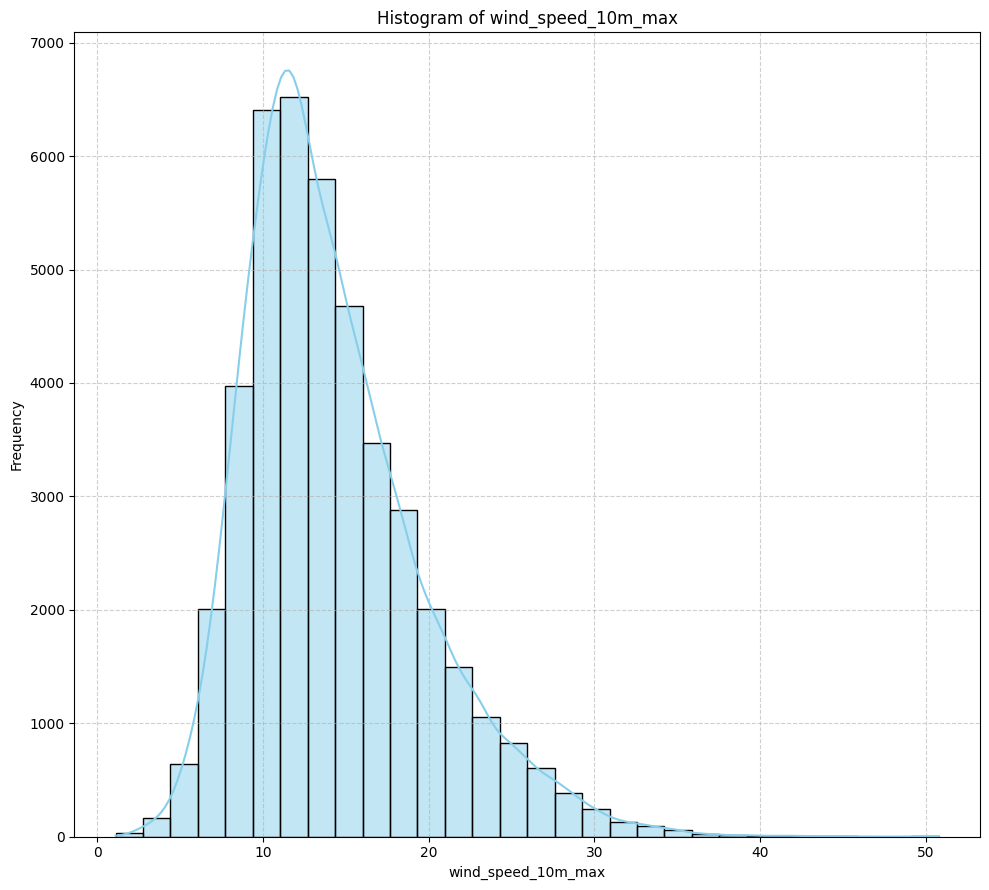

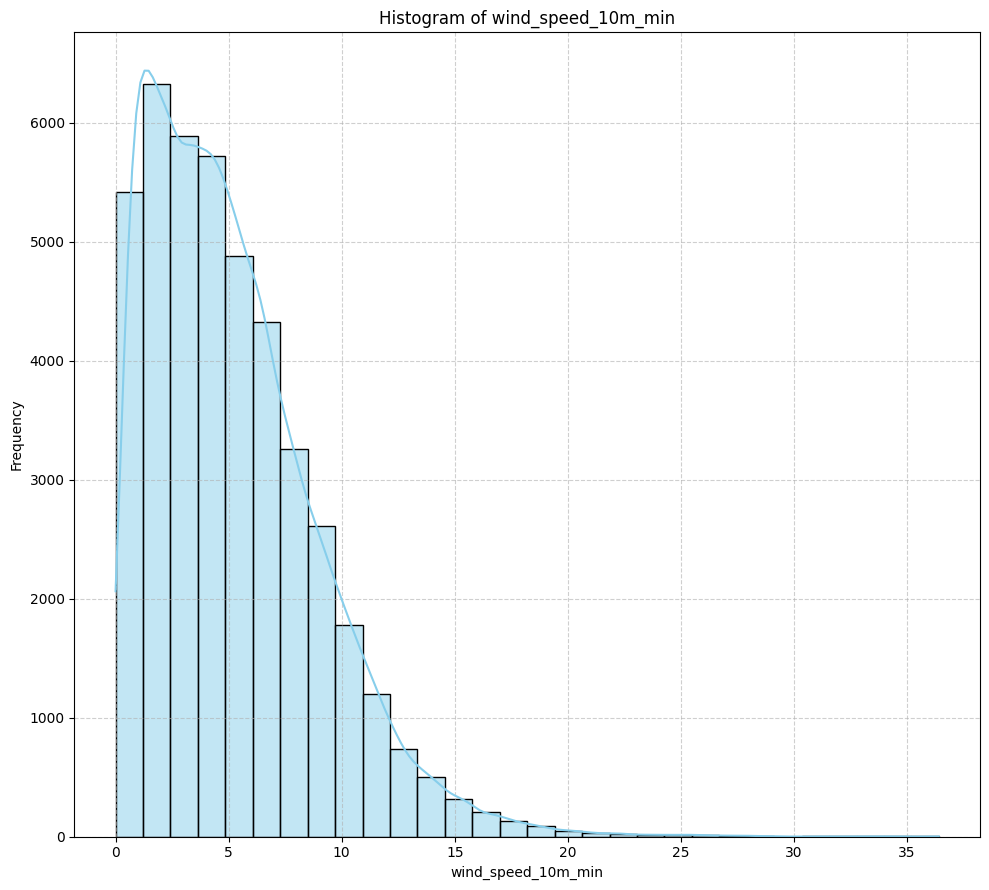

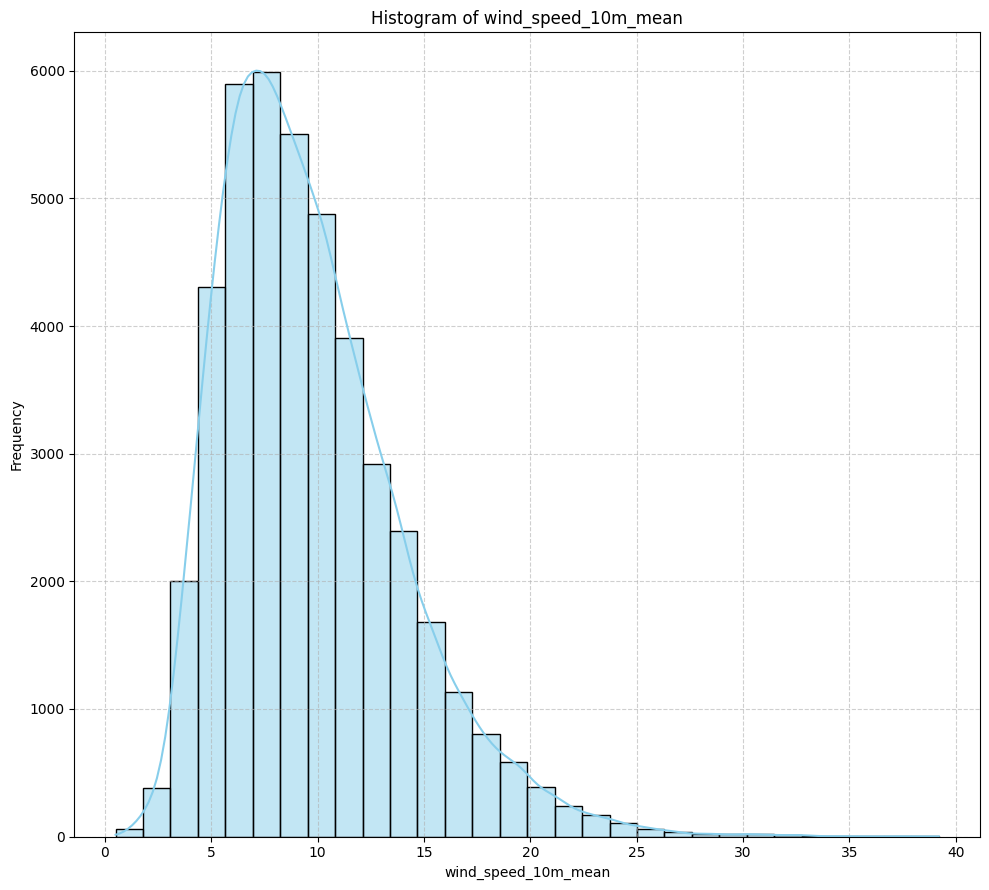

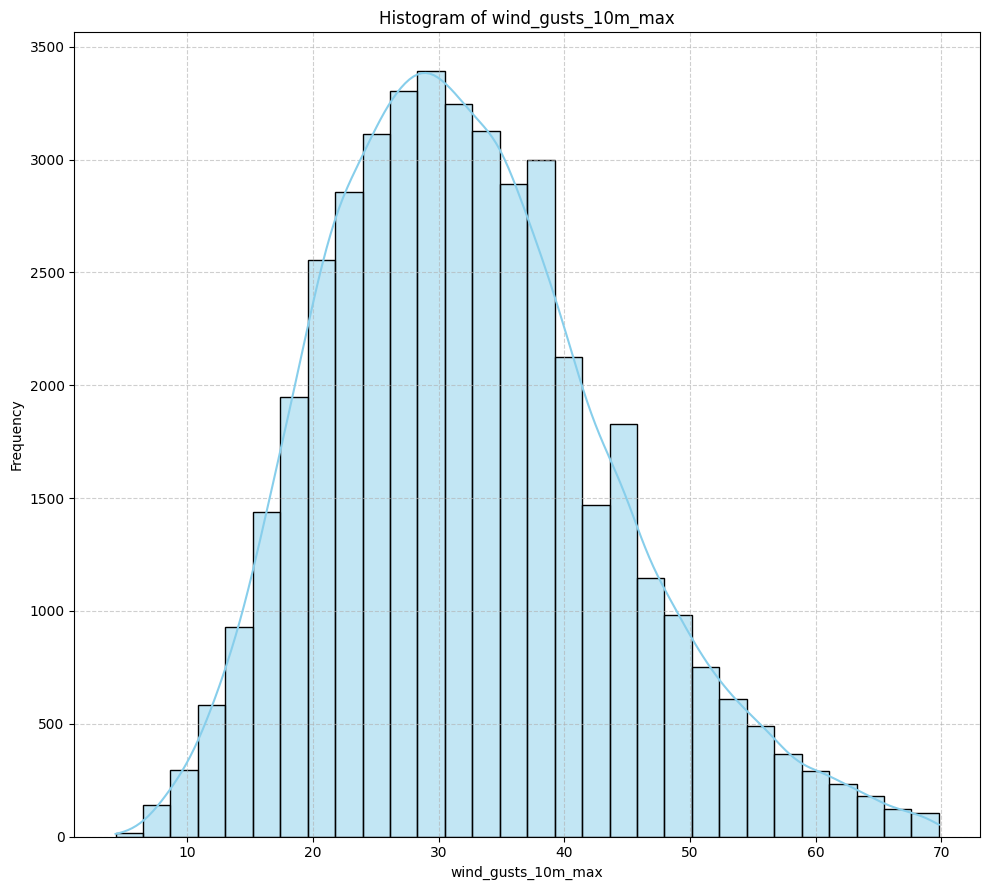

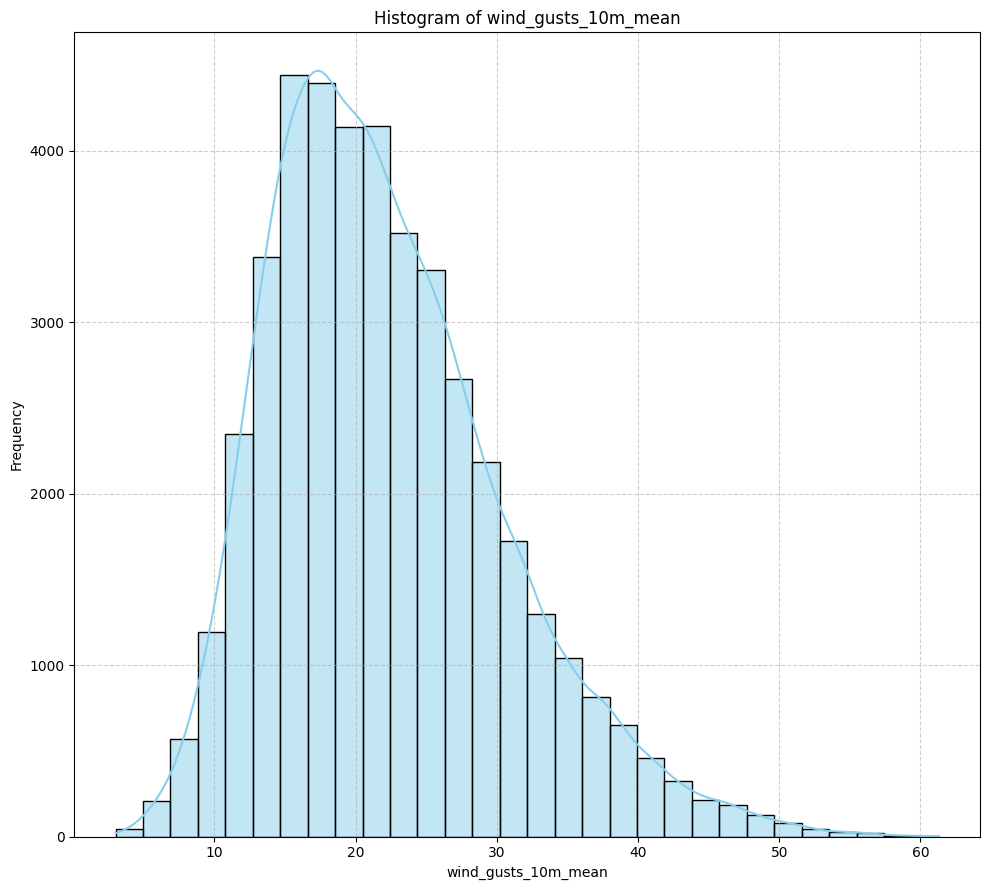

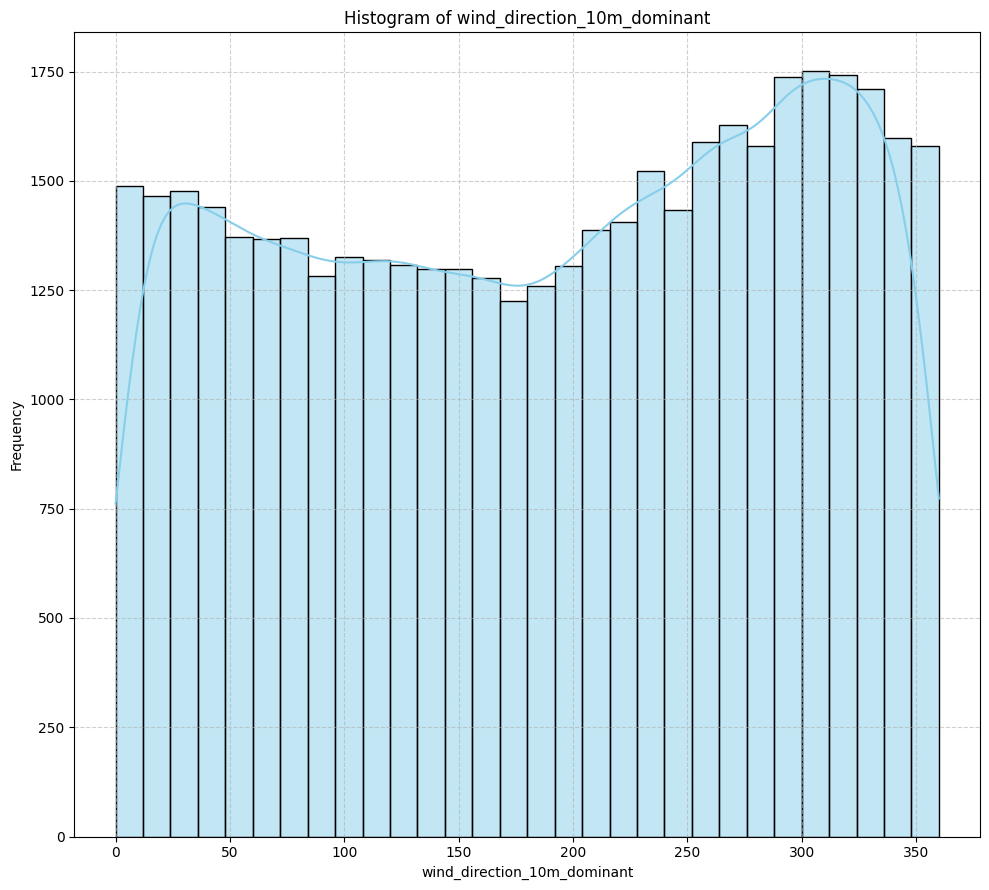

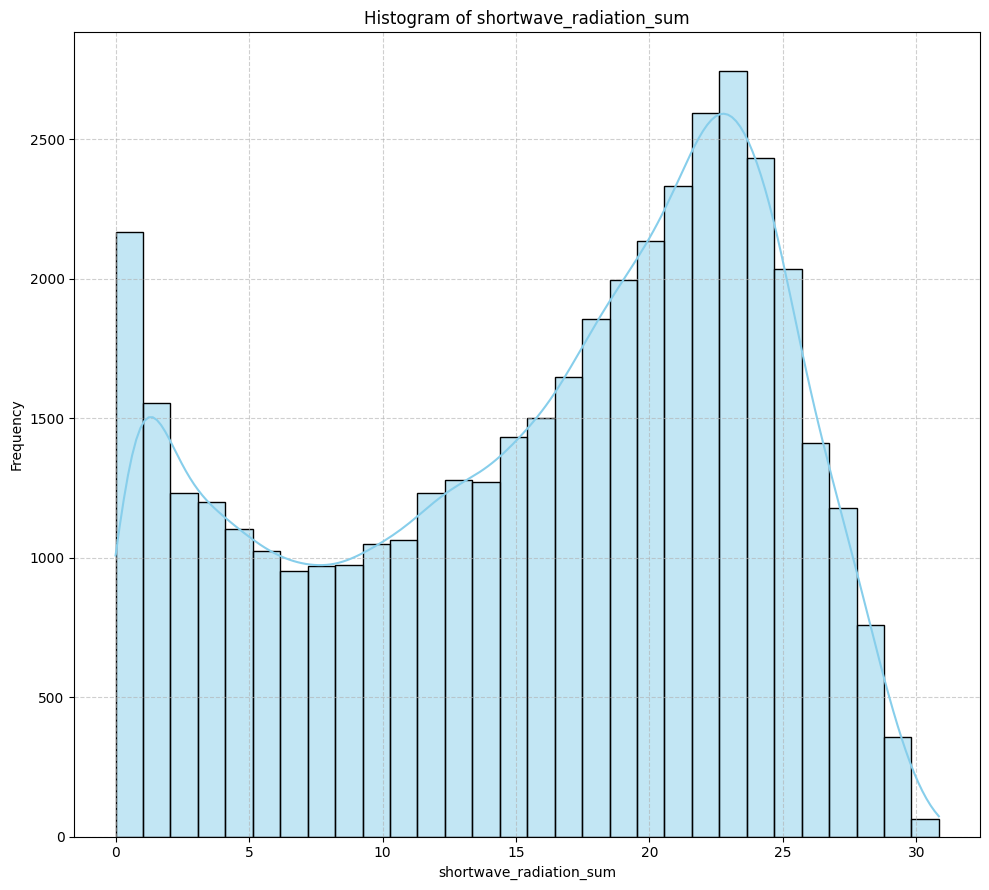

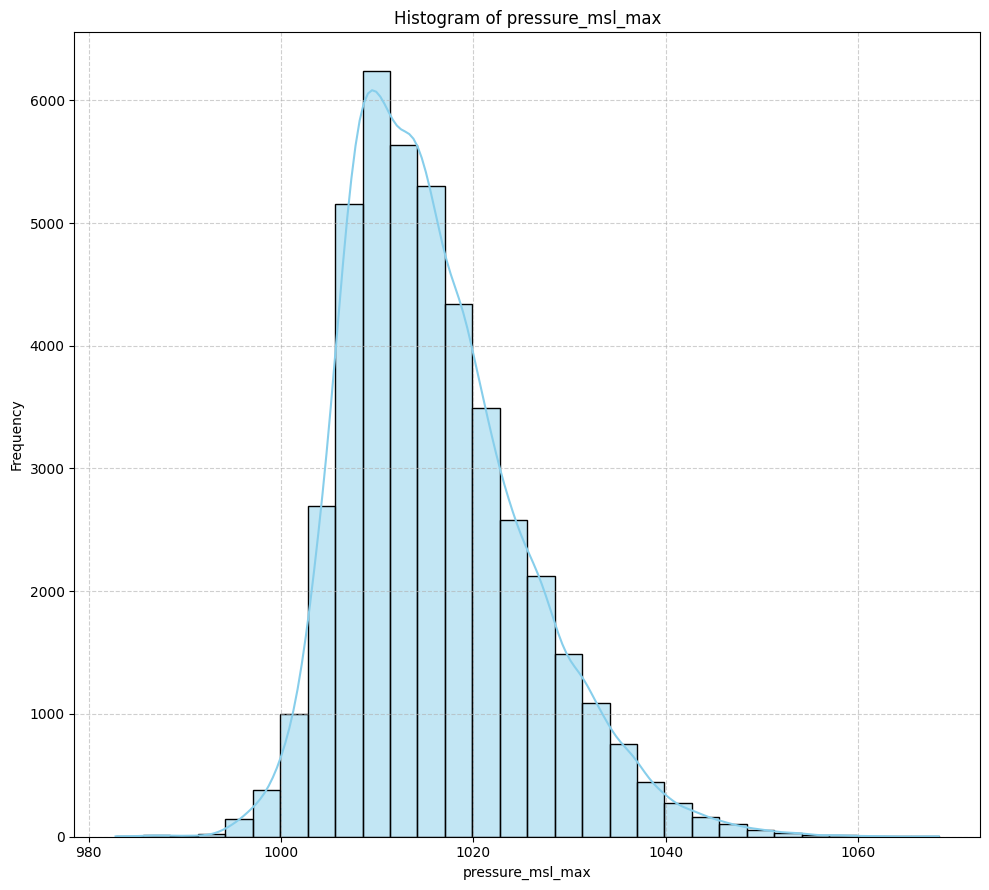

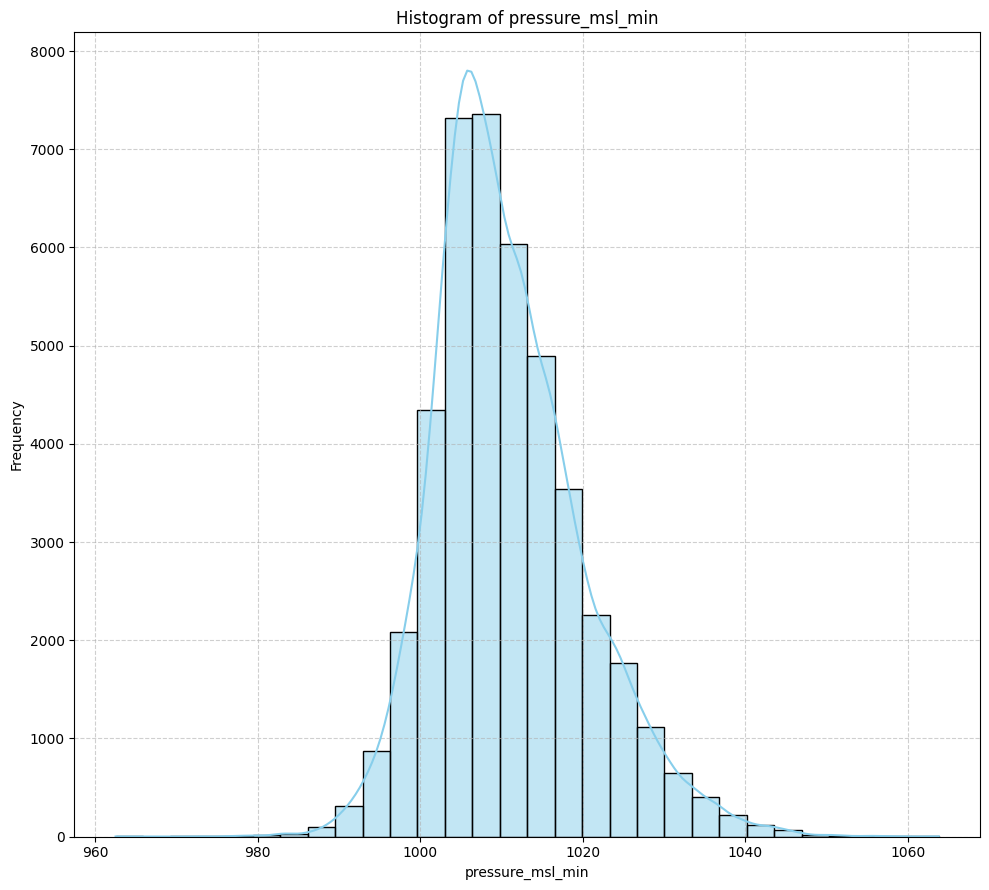

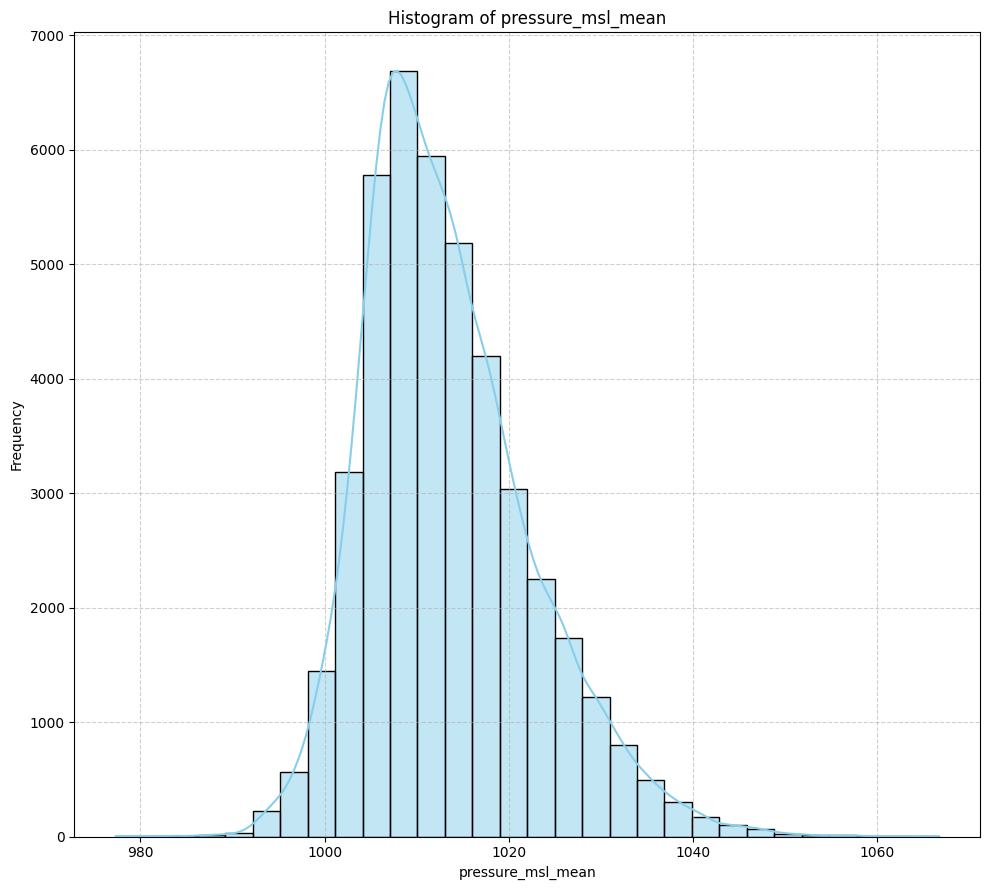

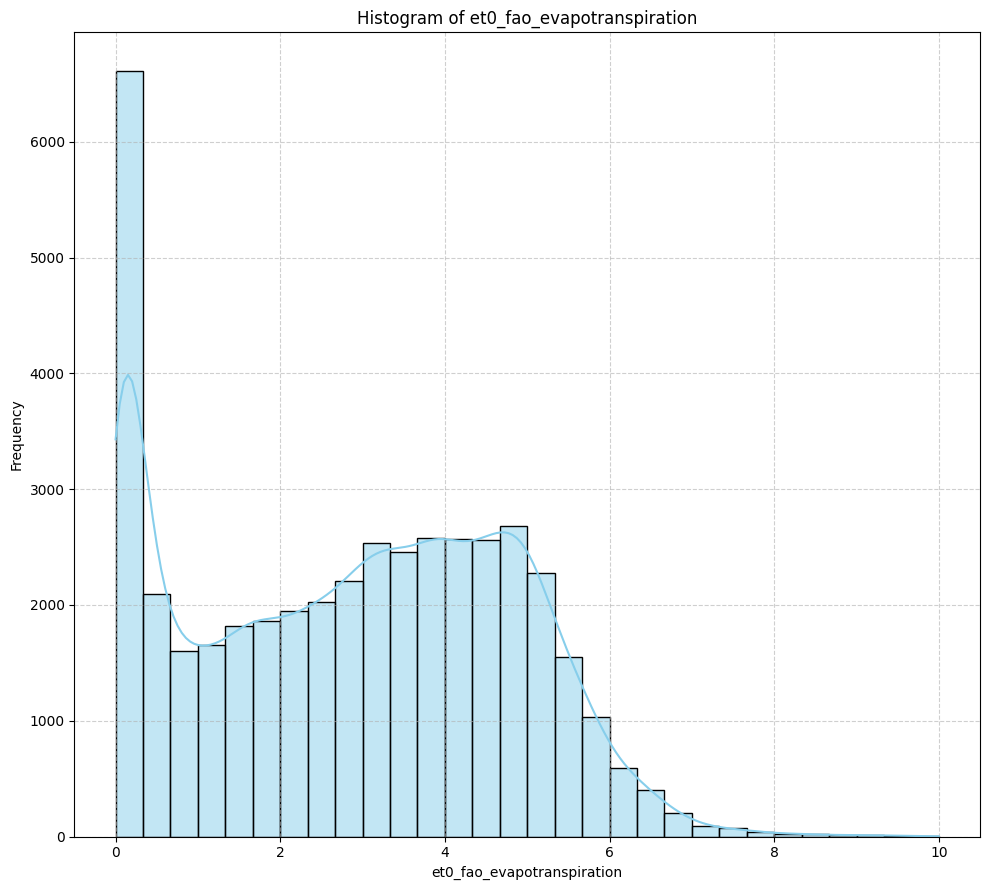

In [ ]:
for column in df.columns:
    # исключаем неинтересные признаки
    if column not in ['sunrise', 'sunset', 'sunshine_duration',
                      'daylight_duration', 'date', 'lat', 'lon', 'label', 'type', 'weather_code', 'year']:

        plt.figure(figsize=(10, 9))
        sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=30)

        plt.title(f'Histogram of {column}')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

Дальнейшее удаление аномалий с помощью методов автоматического удаления выбросов (IQR, Z-score, DBSCAN, Isolation Forest и др.) нецелесообразно поскольку признаки могут отражать физический контекст.

##Далее работаем с признаками

In [ ]:
# Обработка признака date и создание на основе него доп. признаков
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['dayofyear'] = df['date'].dt.dayofyear
df['weekday'] = df['date'].dt.weekday

df['sunshine_duration'] = df['sunshine_duration'] / 3600
df['daylight_duration'] = df['daylight_duration'] / 3600

In [ ]:
#Температурные производные признаки

#Температурный диапазон (амплитуда)
df['temp_range'] = df['temperature_2m_max'] - df['temperature_2m_min'] #разница может указывать на жаркие и сухие дни — риск пожара выше
#Отражение влияния влажности и ветра на ощущаемую жару
df['apparent_diff'] = df['apparent_temperature_mean'] - df['temperature_2m_mean']

#Влажность и осадки

#Дефицит влажности
df['dewpoint_depression'] = df['temperature_2m_mean'] - df['dew_point_2m_mean'] #чем больше разница между температурой и точкой росы, тем суше воздух → выше риск пожара
#Относительная влажность (диапазон)
df['humidity_range'] = df['relative_humidity_2m_max'] - df['relative_humidity_2m_min']

#Ветер

#Размах ветра
df['wind_speed_range'] = df['wind_speed_10m_max'] - df['wind_speed_10m_min']
#Глубина порывов
df['gust_strength'] = df['wind_gusts_10m_max'] - df['wind_speed_10m_mean']

#Радиация и свет

#Интенсивность Солнца на фоне продолжительности дня
df['radiation_per_daylight'] = df['shortwave_radiation_sum'] / (df['daylight_duration'] + 1)

#Индексы пожароопасности

#Индекс Нестерова (упрощённый)
df['nesterov_day'] = (df['temperature_2m_mean'] *
                      (df['temperature_2m_mean'] - df['dew_point_2m_mean'])).clip(lower=0)
#Fire Danger Index (FDI)
df['fdi'] = 2 * df['wind_speed_10m_max'] + (100 - df['relative_humidity_2m_min'])
#Radiation Dryness Index
df['radiation_dryness_index'] = df['shortwave_radiation_sum'] / (df['relative_humidity_2m_mean'] + 1)
#Temperature-Humidity Index (THI) для пожаров
df['thi_fire'] = df['temperature_2m_max'] / (df['relative_humidity_2m_min'] + 1)
#Wind-Dryness Index
df['wind_dryness_index'] = df['wind_speed_10m_mean'] / (df['relative_humidity_2m_mean'] + 1)
#Sunshine Pressure Index
df['sun_pressure_index'] = df['sunshine_duration'] / (df['pressure_msl_mean'] + 1)
#Погодный индекс сухости
df['dryness_index'] = df['dewpoint_depression'] + df['radiation_per_daylight']

In [ ]:
df.describe().T

count                           mean  \
temperature_2m_max           43537.0                      11.506877   
temperature_2m_min           43537.0                       1.476432   
temperature_2m_mean          43537.0                       6.622739   
apparent_temperature_max     43537.0                       8.727809   
apparent_temperature_min     43537.0                      -1.501801   
apparent_temperature_mean    43537.0                       3.834408   
precipitation_sum            43537.0                       0.812729   
rain_sum                     43537.0                       0.665044   
snowfall_sum                 43537.0                       0.117672   
precipitation_hours          43537.0                       1.984726   
relative_humidity_2m_max     43537.0                      81.100857   
relative_humidity_2m_min     43537.0                      44.316558   
relative_humidity_2m_mean    43537.0                      62.510899   
dew_point_2m_max             43537.0                       1.993651   
dew_point_2m_min             43537.0                      -3.718208   
dew_point_2m_mean            43537.0                      -1.029828   
wind_speed_10m_max           43537.0                       14.24608   
wind_speed_10m_min           43537.0                       5.203383   
wind_speed_10m_mean          43537.0                       9.693966   
wind_gusts_10m_max           43537.0                      32.286127   
wind_gusts_10m_mean          43537.0                      22.173939   
wind_direction_10m_dominant  43537.0                     186.496543   
sunshine_duration            43537.0                      10.604561   
daylight_duration            43537.0                      14.731328   
shortwave_radiation_sum      43537.0                      15.724568   
pressure_msl_max             43537.0                    1015.880451   
pressure_msl_min             43537.0                    1010.794072   
pressure_msl_mean            43537.0                    1013.352808   
weather_code                 43537.0                      22.489515   
et0_fao_evapotranspiration   43537.0                       2.858841   
year                         43537.0                    2017.305005   
date                           43537  2018-01-01 13:59:44.950731520   
lat                          43537.0                      58.780452   
lon                          43537.0                     112.517934   
label                        43537.0                       0.273032   
month                        43537.0                       6.611893   
dayofyear                    43537.0                     185.667294   
weekday                      43537.0                       3.000689   
temp_range                   43537.0                      10.030445   
apparent_diff                43537.0                      -2.788332   
dewpoint_depression          43537.0                       7.652567   
humidity_range               43537.0                      36.784298   
wind_speed_range             43537.0                       9.042697   
gust_strength                43537.0                      22.592161   
radiation_per_daylight       43537.0                       0.929549   
nesterov_day                 43537.0                     100.375603   
fdi                          43537.0                      84.175602   
radiation_dryness_index      43537.0                       0.283814   
thi_fire                     43537.0                       0.377881   
wind_dryness_index           43537.0                       0.165572   
sun_pressure_index           43537.0                        0.01047   
dryness_index                43537.0                       8.582116   

                                             min                  25%  \
temperature_2m_max                         -51.8                  3.6   
temperature_2m_min                         -56.0                 -4.4   
temperature_2m_mean                        -53.5

# Повторный анализ аномалий для новых признаков
# Индекс пожароопасности thi_fire и wind_dryness_index
- по информации взятой из интернета значения индекса пожароопасности thi_fire (Индекс ТИ) более 3.0 являются аномальными, для индекса wind_dryness_index (Индекс ветровой сухости) аномальными являются значения более 1.1 (для климатических зон из данного датасета)


In [ ]:
df = df[~((df['thi_fire'] > 3.00) | (df['wind_dryness_index'] > 1.1))]

In [ ]:
df.describe().T

count                           mean  \
temperature_2m_max           43528.0                       11.50456   
temperature_2m_min           43528.0                       1.475023   
temperature_2m_mean          43528.0                       6.620849   
apparent_temperature_max     43528.0                       8.725903   
apparent_temperature_min     43528.0                      -1.502892   
apparent_temperature_mean    43528.0                       3.832862   
precipitation_sum            43528.0                       0.812897   
rain_sum                     43528.0                       0.665181   
snowfall_sum                 43528.0                       0.117696   
precipitation_hours          43528.0                       1.985136   
relative_humidity_2m_max     43528.0                      81.110297   
relative_humidity_2m_min     43528.0                      44.323654   
relative_humidity_2m_mean    43528.0                      62.519436   
dew_point_2m_max             43528.0                       1.994622   
dew_point_2m_min             43528.0                      -3.716576   
dew_point_2m_mean            43528.0                      -1.028398   
wind_speed_10m_max           43528.0                      14.244785   
wind_speed_10m_min           43528.0                       5.202906   
wind_speed_10m_mean          43528.0                       9.692995   
wind_gusts_10m_max           43528.0                      32.283877   
wind_gusts_10m_mean          43528.0                      22.172144   
wind_direction_10m_dominant  43528.0                     186.489294   
sunshine_duration            43528.0                      10.604161   
daylight_duration            43528.0                      14.731439   
shortwave_radiation_sum      43528.0                      15.723293   
pressure_msl_max             43528.0                    1015.880024   
pressure_msl_min             43528.0                    1010.793241   
pressure_msl_mean            43528.0                    1013.352157   
weather_code                 43528.0                      22.493659   
et0_fao_evapotranspiration   43528.0                       2.858301   
year                         43528.0                    2017.304677   
date                           43528  2018-01-01 11:37:32.233045504   
lat                          43528.0                      58.781982   
lon                          43528.0                     112.523395   
label                        43528.0                       0.272997   
month                        43528.0                       6.612089   
dayofyear                    43528.0                     185.673704   
weekday                      43528.0                        3.00085   
temp_range                   43528.0                      10.029537   
apparent_diff                43528.0                      -2.787987   
dewpoint_depression          43528.0                       7.649246   
humidity_range               43528.0                      36.786643   
wind_speed_range             43528.0                       9.041879   
gust_strength                43528.0                      22.590882   
radiation_per_daylight       43528.0                       0.929445   
nesterov_day                 43528.0                     100.304462   
fdi                          43528.0                      84.165916   
radiation_dryness_index      43528.0                       0.283664   
thi_fire                     43528.0                       0.377482   
wind_dryness_index           43528.0                       0.165461   
sun_pressure_index           43528.0                        0.01047   
dryness_index                43528.0                       8.578691   

                                             min                  25%  \
temperature_2m_max                         -51.8                  3.6   
temperature_2m_min                         -56.0                 -4.4   
temperature_2m_mean                        -53.5

In [ ]:
df.columns

Index(['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'apparent_temperature_mean', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'relative_humidity_2m_max',
       'relative_humidity_2m_min', 'relative_humidity_2m_mean',
       'dew_point_2m_max', 'dew_point_2m_min', 'dew_point_2m_mean',
       'wind_speed_10m_max', 'wind_speed_10m_min', 'wind_speed_10m_mean',
       'wind_gusts_10m_max', 'wind_gusts_10m_mean',
       'wind_direction_10m_dominant', 'sunrise', 'sunset', 'sunshine_duration',
       'daylight_duration', 'shortwave_radiation_sum', 'pressure_msl_max',
       'pressure_msl_min', 'pressure_msl_mean', 'weather_code',
       'et0_fao_evapotranspiration', 'year', 'date', 'lat', 'lon', 'label',
       'type', 'month', 'dayofyear', 'weekday', 'temp_range', 'apparent_diff',
       'dewpoint_depression', 'humidity_range', 'wind_speed_range',
       'gust_strengt

# Построение phi_k корреляционной матрицы

interval columns not set, guessing: ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'relative_humidity_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'dew_point_2m_mean', 'wind_speed_10m_max', 'wind_speed_10m_min', 'wind_speed_10m_mean', 'wind_gusts_10m_max', 'wind_gusts_10m_mean', 'wind_direction_10m_dominant', 'sunshine_duration', 'daylight_duration', 'shortwave_radiation_sum', 'pressure_msl_max', 'pressure_msl_min', 'pressure_msl_mean', 'weather_code', 'et0_fao_evapotranspiration', 'year', 'lat', 'lon', 'label', 'month', 'dayofyear', 'weekday', 'temp_range', 'apparent_diff', 'dewpoint_depression', 'humidity_range', 'wind_speed_range', 'gust_strength', 'radiation_per_daylight', 'nesterov_day', 'fdi', 'radiation_dryness_index', 'thi_fire', 'wind_dryness

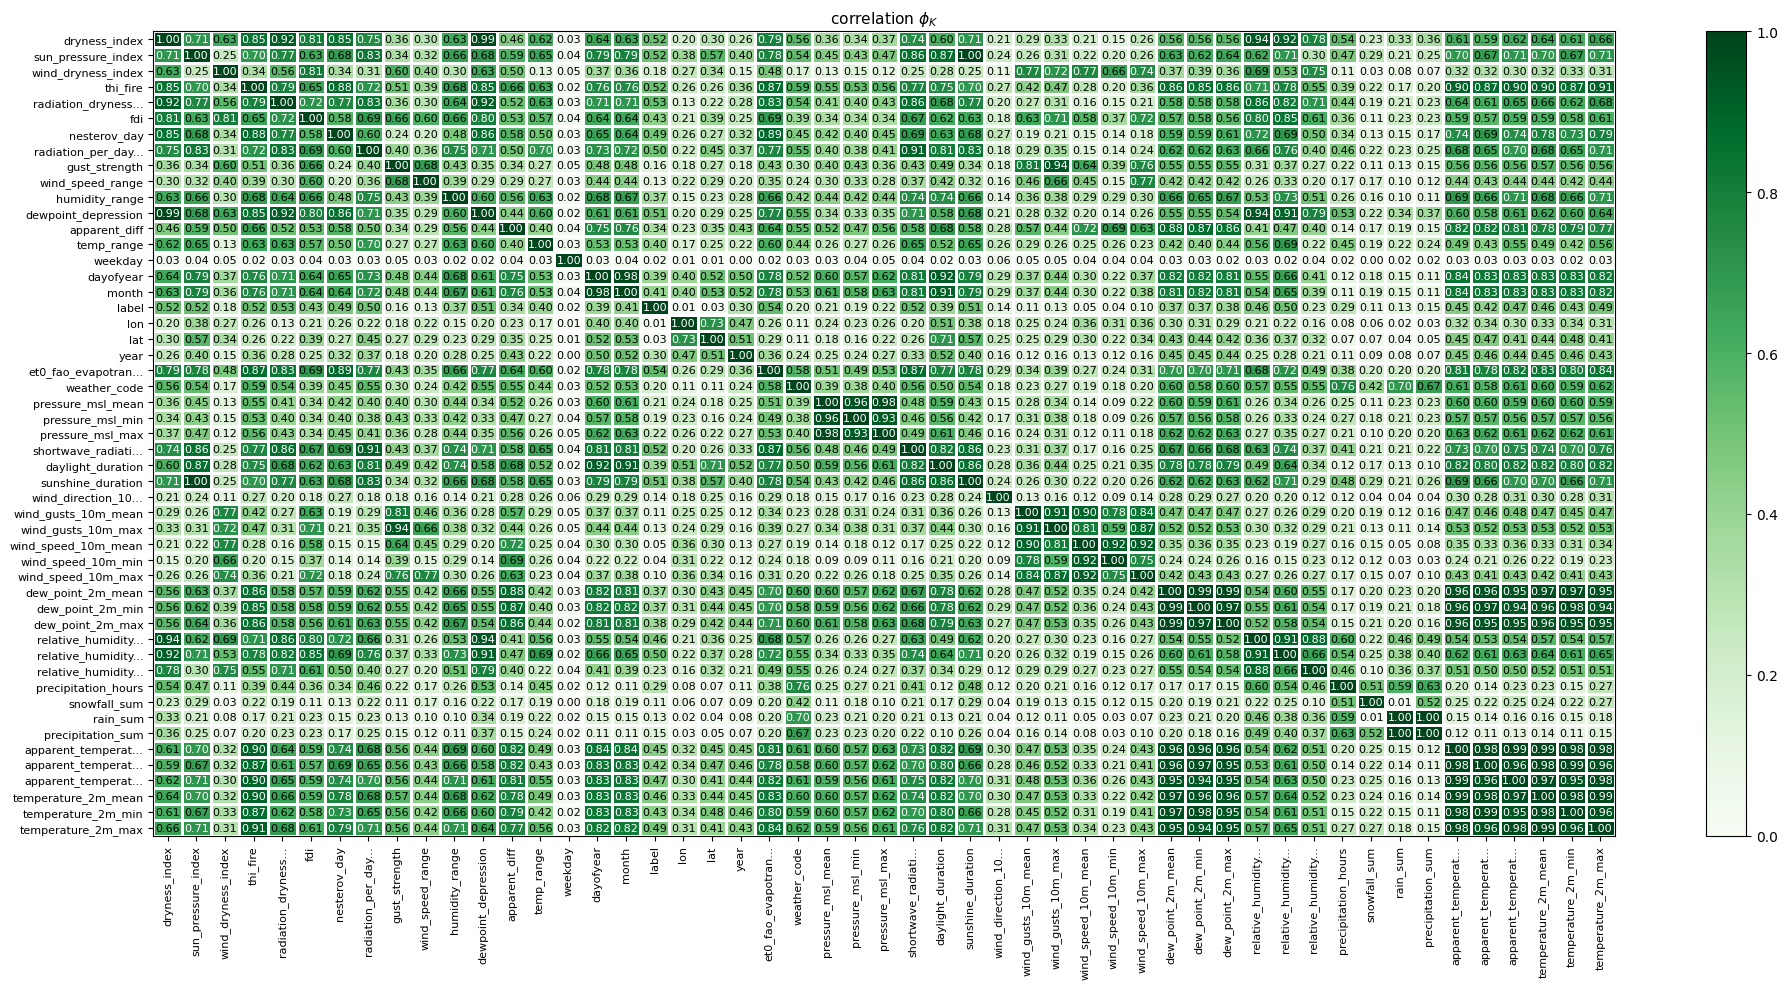

In [ ]:
phik_overview = df.drop(columns=['type', 'sunrise', 'sunset', 'date']).phik_matrix().round(2)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(20, 10))
plt.tight_layout()

Как видно из корреляционной матрицы, некоторые признаки сильно скоррелированы между собой, поэтому подберем порог корреляции между признаками и удалим все признаки, где коэффициент корреляции выше этого прога

In [ ]:
#Выбираем из пары скоррелированных признаков тот, который больше скоррелирован с целевыой переменной
from phik import resources
from phik.report import plot_correlation_matrix
from phik import phik_matrix
import numpy as np

df1 = df.drop(columns=['type', 'sunrise', 'sunset', 'year'])

phik_corr = df1.phik_matrix()

# Порог корреляции
correlation_threshold = 0.8

features = df1.columns.drop('label').tolist()
to_remove = set()

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        f1 = features[i]
        f2 = features[j]

        if f1 in to_remove or f2 in to_remove:
            continue

        corr = phik_corr.loc[f1, f2]
        if corr >= correlation_threshold:
            corr_f1_label = phik_corr.loc[f1, 'label']
            corr_f2_label = phik_corr.loc[f2, 'label']

            if corr_f1_label >= corr_f2_label:
                to_remove.add(f2)
            else:
                to_remove.add(f1)

selected_features = [f for f in features if f not in to_remove]
selected_features.append('label')
df_final = df[selected_features]

print(f"Удалено {len(to_remove)} признаков: {to_remove}")
print(f"Итоговое число признаков: {len(selected_features)-1}")


interval columns not set, guessing: ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'relative_humidity_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'dew_point_2m_mean', 'wind_speed_10m_max', 'wind_speed_10m_min', 'wind_speed_10m_mean', 'wind_gusts_10m_max', 'wind_gusts_10m_mean', 'wind_direction_10m_dominant', 'sunshine_duration', 'daylight_duration', 'shortwave_radiation_sum', 'pressure_msl_max', 'pressure_msl_min', 'pressure_msl_mean', 'weather_code', 'et0_fao_evapotranspiration', 'lat', 'lon', 'label', 'month', 'dayofyear', 'weekday', 'temp_range', 'apparent_diff', 'dewpoint_depression', 'humidity_range', 'wind_speed_range', 'gust_strength', 'radiation_per_daylight', 'nesterov_day', 'fdi', 'radiation_dryness_index', 'thi_fire', 'wind_dryness_index',

/usr/local/lib/python3.11/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable date is large: 3353. Are you sure this is not an interval variable? Analysis for pairs of variables including date can be slow.
  warnings.warn(


Удалено 31 признаков: {'relative_humidity_2m_min', 'pressure_msl_mean', 'radiation_dryness_index', 'temperature_2m_mean', 'shortwave_radiation_sum', 'radiation_per_daylight', 'relative_humidity_2m_max', 'wind_speed_10m_mean', 'fdi', 'wind_gusts_10m_max', 'nesterov_day', 'date', 'apparent_temperature_mean', 'apparent_temperature_max', 'temperature_2m_max', 'pressure_msl_max', 'apparent_temperature_min', 'dayofyear', 'pressure_msl_min', 'sunshine_duration', 'rain_sum', 'dew_point_2m_max', 'wind_speed_10m_max', 'dew_point_2m_mean', 'temperature_2m_min', 'daylight_duration', 'thi_fire', 'dew_point_2m_min', 'relative_humidity_2m_mean', 'dewpoint_depression', 'wind_gusts_10m_mean'}
Итоговое число признаков: 19


Повторно строим корреляционную матрицу для обновленного датасета

interval columns not set, guessing: ['precipitation_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_min', 'wind_direction_10m_dominant', 'weather_code', 'et0_fao_evapotranspiration', 'lat', 'lon', 'month', 'weekday', 'temp_range', 'apparent_diff', 'humidity_range', 'wind_speed_range', 'gust_strength', 'wind_dryness_index', 'sun_pressure_index', 'dryness_index', 'label']


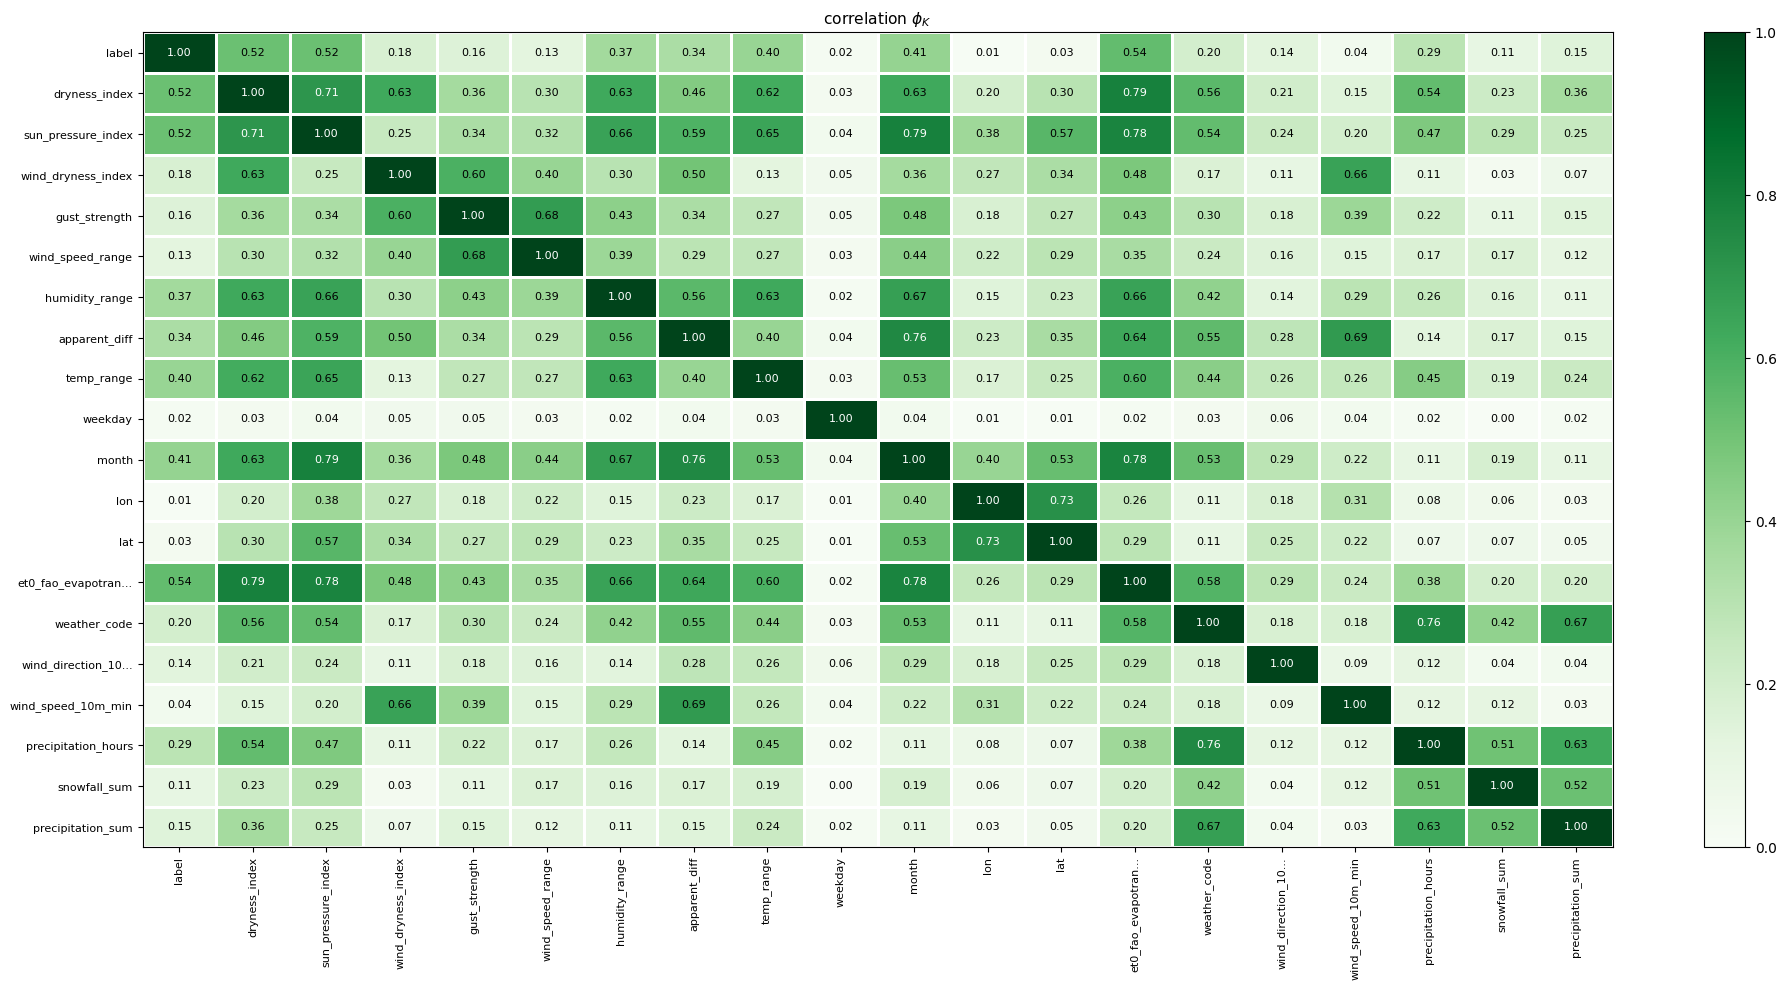

In [ ]:
phik_overview = df_final.phik_matrix().round(2)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(20, 10))
plt.tight_layout()

In [ ]:
# Добавляем дату для дальнейшего использования при делении датасета
df_final['date'] = df['date']

<ipython-input-18-35e1780e1d81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['date'] = df['date']


Обучаем пробные модели на разных версиях датасета, строим пайплайн из нормализации, кодирования категориальных признаков, деление датасета по временному признаку (сортируем датасет по дате, делим 70/30) и RF-модели

In [ ]:
#ДАТАСЕТ С УДАЛЕННЫМИ СКОРРЕЛИРОВАНЫМИ ПРИЗНАКАМИ

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


df_p = df_final.sort_values('date')


X = df_p.drop(columns=['label', 'date'])
y = df_p['label']

split_index = int(len(df_p) * 0.7)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(numeric_features)
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print(categorical_features)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        random_state=42,
        class_weight= {0: 1, 1: 1}#"balanced"
    ))
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print("Accuracy:", model_pipeline.score(X_test, y_test))

report = classification_report(y_test, y_pred, target_names=["No Fire", "Fire"])
print("📄 Classification Report:\n")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("🧮 Confusion Matrix:\n", cm)

['precipitation_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_min', 'wind_direction_10m_dominant', 'weather_code', 'et0_fao_evapotranspiration', 'lat', 'lon', 'temp_range', 'apparent_diff', 'humidity_range', 'wind_speed_range', 'gust_strength', 'wind_dryness_index', 'sun_pressure_index', 'dryness_index']
[]
Accuracy: 0.6237077877325982
📄 Classification Report:

              precision    recall  f1-score   support

     No Fire       0.63      0.90      0.75      7983
        Fire       0.55      0.18      0.27      5076

    accuracy                           0.62     13059
   macro avg       0.59      0.54      0.51     13059
weighted avg       0.60      0.62      0.56     13059

🧮 Confusion Matrix:
 [[7223  760]
 [4154  922]]


In [ ]:
#ДАТАСЕТ СО ВСЕМИ НОВЫМИ ПРИЗНАКАМИ
df_p = df.sort_values('date')


X = df_p.drop(columns=['label', 'date', 'type', 'sunrise', 'sunset', 'year'])
y = df_p['label']

split_index = int(len(df_p) * 0.7)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(numeric_features)
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print(categorical_features)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        random_state=42,
        class_weight= {0: 1, 1: 1}#"balanced"
    ))
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print("Accuracy:", model_pipeline.score(X_test, y_test))

report = classification_report(y_test, y_pred, target_names=["No Fire", "Fire"])
print("📄 Classification Report:\n")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("🧮 Confusion Matrix:\n", cm)

['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'relative_humidity_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'dew_point_2m_mean', 'wind_speed_10m_max', 'wind_speed_10m_min', 'wind_speed_10m_mean', 'wind_gusts_10m_max', 'wind_gusts_10m_mean', 'wind_direction_10m_dominant', 'sunshine_duration', 'daylight_duration', 'shortwave_radiation_sum', 'pressure_msl_max', 'pressure_msl_min', 'pressure_msl_mean', 'weather_code', 'et0_fao_evapotranspiration', 'lat', 'lon', 'temp_range', 'apparent_diff', 'dewpoint_depression', 'humidity_range', 'wind_speed_range', 'gust_strength', 'radiation_per_daylight', 'nesterov_day', 'fdi', 'radiation_dryness_index', 'thi_fire', 'wind_dryness_index', 'sun_pressure_index', 'dryness_index']
[]
Accuracy: 0.6255456007351252
📄 Clas

In [ ]:
df_1st = pd.read_csv('df_full43875k.csv', sep=',', index_col=0)#
df_1st = df_1st.drop(columns=['index', 'lat_x', 'lon_x', 'dt_x', 'dt_y', 'lat_y', 'lon_y', 'lat_group', 'lon_group', 'group_id', 'type_name', 'type_id'])
df_1st = df_1st[df_1st['wind_gusts_10m_max'] <= 70]
df_1st = df_1st[(df_1st['precipitation_sum'] < 50) | (df_1st['rain_sum'] < 50)]
df_1st['date'] = pd.to_datetime(df_1st['date'])

In [ ]:
#ПЕРВОНАЧАЛЬНЫЙ ДАТАСЕТ
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df_p = df_1st.sort_values('date')


X = df_p.drop(columns=['label', 'date', 'type', 'sunrise', 'sunset', 'year'])
y = df_p['label']

split_index = int(len(df_p) * 0.7)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(numeric_features)
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print(categorical_features)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        random_state=42,
        class_weight= {0: 1, 1: 1}#"balanced"
    ))
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print("Accuracy:", model_pipeline.score(X_test, y_test))

report = classification_report(y_test, y_pred, target_names=["No Fire", "Fire"])
print("📄 Classification Report:\n")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'relative_humidity_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'dew_point_2m_mean', 'wind_speed_10m_max', 'wind_speed_10m_min', 'wind_speed_10m_mean', 'wind_gusts_10m_max', 'wind_gusts_10m_mean', 'wind_direction_10m_dominant', 'sunshine_duration', 'daylight_duration', 'shortwave_radiation_sum', 'pressure_msl_max', 'pressure_msl_min', 'pressure_msl_mean', 'weather_code', 'et0_fao_evapotranspiration', 'lat', 'lon']
[]
Accuracy: 0.6264737406216506
📄 Classification Report:

              precision    recall  f1-score   support

     No Fire       0.64      0.91      0.75      7987
        Fire       0.56      0.18      0.27      5075

    accuracy                           0.63     13062
   macro avg       0

#Результаты моделей классификации

## 🔹 Первоначальный датасет

**Accuracy:** `0.6265`

### 📄 Classification Report
| Class     | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| No Fire   | 0.64      | 0.91   | 0.75     | 7987    |
| Fire      | 0.56      | 0.18   | 0.27     | 5075    |
| **Accuracy** |       |        | **0.63** | 13062   |
| **Macro avg** | 0.60  | 0.54   | 0.51     | 13062   |
| **Weighted avg** | 0.61 | 0.63 | 0.56     | 13062   |

## 🔹 Датасет с новыми признаками

**Accuracy:** `0.6255`

### 📄 Classification Report
| Class     | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| No Fire   | 0.64      | 0.91   | 0.75     | 7983    |
| Fire      | 0.56      | 0.18   | 0.27     | 5076    |
| **Accuracy** |       |        | **0.63** | 13059   |
| **Macro avg** | 0.60  | 0.54   | 0.51     | 13059   |
| **Weighted avg** | 0.61 | 0.63 | 0.56     | 13059   |

## 🔹 Датасет с удалёнными скоррелированными  новыми признаками

**Accuracy:** `0.6237`

### 📄 Classification Report
| Class     | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| No Fire   | 0.63      | 0.90   | 0.75     | 7983    |
| Fire      | 0.55      | 0.18   | 0.27     | 5076    |
| **Accuracy** |       |        | **0.62** | 13059   |
| **Macro avg** | 0.59  | 0.54   | 0.51     | 13059   |
| **Weighted avg** | 0.60 | 0.62 | 0.56     | 13059   |

Как видно из полученных результатов, первоначальный датасет и датасет с новыми признаками показали схожие результаты; также стоит заметить, что лучшие результаты были показаны с class_weight= {0: 1, 1: 1}, хотя имеется дисбаланс классов.

Далее предполагается использовать исходный датасет, потому что случайный лес может эффективно работать с коррелирующими признаками, используя их по-разному в отдельных деревьях, а значит не факт, что другие модели также эффективно смогут это обойти и не "словят" проблемы мультиколлинеарности, однако возможно тестово можно будет прогнать датасет с новыми признаками на улучшенных моделях в дальнейшем.

Используем pycaret, в нем можно наравне с другими моделями оценить еще и catboost

In [ ]:
from pycaret.classification import *
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


df_pc = df_1st.sort_values("date").reset_index(drop=True)

split_index = int(len(df_1st) * 0.7)
train_df = df_1st.iloc[:split_index]
test_df = df_1st.iloc[split_index:]

clf = setup(
    data=train_df,
    target='label',
    ignore_features=['date'],
    session_id=42,
    categorical_features=None,
    normalize=True,
    transformation=False,
    remove_multicollinearity=False,
    fix_imbalance=True,
    verbose=False
)

# Сравнение всех моделей
best_model = compare_models(n_select=1, sort='F1')  # или 'Recall', 'AUC', 'Accuracy'


predictions = predict_model(best_model, data=test_df)


y_true = test_df['label']
y_pred = predictions['label']

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

models()


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[[9240    0]
 [   0 3822]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9240
           1       1.00      1.00      1.00      3822

    accuracy                           1.00     13062
   macro avg       1.00      1.00      1.00     13062
weighted avg       1.00      1.00      1.00     13062



Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

На данном этапе были использованы два AutoML-инструмента — H2O AutoML и PyCaret.

На основании AutoML-оценок выбраны лучшие кандидаты для дальнейшей оптимизации через Optuna:
- CatBoost
- XGBoost
- LightGBM
- Random Forest

In [ ]:
#Вынимаем гиперпараметры из pycaret для catboost

catboost_model = create_model('catboost')
print(catboost_model.get_all_params())


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'random_score_type': 'NormalWithModelSizeDecrease', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 42, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learnin

In [ ]:
df_1st.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43537 entries, 0 to 43874
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   temperature_2m_max           43537 non-null  float64       
 1   temperature_2m_min           43537 non-null  float64       
 2   temperature_2m_mean          43537 non-null  float64       
 3   apparent_temperature_max     43537 non-null  float64       
 4   apparent_temperature_min     43537 non-null  float64       
 5   apparent_temperature_mean    43537 non-null  float64       
 6   precipitation_sum            43537 non-null  float64       
 7   rain_sum                     43537 non-null  float64       
 8   snowfall_sum                 43537 non-null  float64       
 9   precipitation_hours          43537 non-null  float64       
 10  relative_humidity_2m_max     43537 non-null  float64       
 11  relative_humidity_2m_min     43537 non-null  f

In [ ]:
#Строим catboost с вытащенными гиперпараметрами
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pandas as pd
import numpy as np

df_p = df_1st.sort_values('date')

X = df_p.drop(columns=['label', 'date', 'type', 'sunrise', 'sunset', 'year'])
y = df_p['label']


split_index = int(len(df_p) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

params = {
    'nan_mode': 'Min',
    'eval_metric': 'Logloss',
    'iterations': 1000,
    'sampling_frequency': 'PerTree',
    'leaf_estimation_method': 'Newton',
    'random_score_type': 'NormalWithModelSizeDecrease',
    'grow_policy': 'SymmetricTree',
    'penalties_coefficient': 1,
    'boosting_type': 'Plain',
    'model_shrink_mode': 'Constant',
    'feature_border_type': 'GreedyLogSum',
    'eval_fraction': 0,
    'l2_leaf_reg': 3,
    'random_strength': 1,
    'rsm': 1,
    'boost_from_average': False,
    'model_size_reg': 0.5,
    'subsample': 0.800000011920929,
    'use_best_model': False,
    'class_names': [0, 1],
    'random_seed': 42,
    'depth': 6,
    'posterior_sampling': False,
    'border_count': 254,
    'classes_count': 0,
    'auto_class_weights': 'None',
    'sparse_features_conflict_fraction': 0,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'best_model_min_trees': 1,
    'model_shrink_rate': 0,
    'min_data_in_leaf': 1,
    'loss_function': 'Logloss',
    'learning_rate': 0.044870998710393906,
    'score_function': 'Cosine',
    'task_type': 'CPU',
    'leaf_estimation_iterations': 10,
    'bootstrap_type': 'MVS',
    'max_leaves': 64
}


model = CatBoostClassifier(**params)
model.fit(train_pool, verbose=100)


y_pred = model.predict(test_pool)
y_pred = y_pred.astype(int)


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"F1-score: {f1_score(y_test, y_pred):.4f}")


0:	learn: 0.6535495	total: 108ms	remaining: 1m 47s
100:	learn: 0.4055825	total: 4.85s	remaining: 43.2s
200:	learn: 0.3921643	total: 8.33s	remaining: 33.1s
300:	learn: 0.3796113	total: 11.7s	remaining: 27.2s
400:	learn: 0.3667296	total: 15.8s	remaining: 23.6s
500:	learn: 0.3556539	total: 17.5s	remaining: 17.5s
600:	learn: 0.3453137	total: 19.3s	remaining: 12.8s
700:	learn: 0.3355993	total: 21s	remaining: 8.95s
800:	learn: 0.3268339	total: 22.7s	remaining: 5.65s
900:	learn: 0.3182506	total: 24.5s	remaining: 2.69s
999:	learn: 0.3105676	total: 26.9s	remaining: 0us
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      5507
           1       0.54      0.28      0.37      3201

    accuracy                           0.65      8708
   macro avg       0.61      0.57      0.56      8708
weighted avg       0.62      0.65      0.61      8708

Confusion Matrix:
[[4723  784]
 [2290  911]]
F1-score: 0.3721


In [ ]:
xgb_model = create_model('xgboost')
print(xgb_model.get_params())

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': 'cpu', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'auto', 'validate_parameters': None, 'verbosity': 0}


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix

df_p = df_1st.sort_values('date')

X = df_p.drop(columns=['label', 'date', 'type', 'sunrise', 'sunset', 'year'])
y = df_p['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


xgb_params = {
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'tree_method': 'auto',
    'learning_rate': 0.25,
    'max_depth': 5,
    'subsample': 0.51,
    'colsample_bytree': 0.72,
    'reg_lambda': 0.93,
    'reg_alpha': 1.62,
    'n_estimators': 763,
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': 0
}


model = XGBClassifier(**xgb_params)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("F1 Score:", round(f1_score(y_test, y_pred), 4))


Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      5507
           1       0.53      0.38      0.44      3201

    accuracy                           0.65      8708
   macro avg       0.61      0.59      0.59      8708
weighted avg       0.63      0.65      0.63      8708

Confusion Matrix:
[[4430 1077]
 [1996 1205]]
F1 Score: 0.4395


In [ ]:
rf_model = create_model('rf')
print(rf_model.get_params())

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix


df_p = df_1st.sort_values('date')


X = df_p.drop(columns=['label', 'date', 'type', 'sunrise', 'sunset', 'year'])
y = df_p['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


rf_params = {
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'monotonic_cst': None,
    'n_estimators': 100,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': 42,
    'verbose': 0,
    'warm_start': False
}


model = RandomForestClassifier(**rf_params)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("F1 Score:", round(f1_score(y_test, y_pred), 4))


Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      5507
           1       0.55      0.25      0.35      3201

    accuracy                           0.65      8708
   macro avg       0.61      0.57      0.55      8708
weighted avg       0.62      0.65      0.61      8708

Confusion Matrix:
[[4836  671]
 [2391  810]]
F1 Score: 0.346


В предыдущих шагах были построены 3 модели с гиперпараметрами, которые были выгружены из pycaret, лучшие результаты показал XGBoost, который и будет использован далее

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, log_loss, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Определяем заново датасет, чтобы ничего не потерять
df_1st = pd.read_csv('df_full43875k.csv', sep=',', index_col=0)#
df_1st = df_1st.drop(columns=['index', 'lat_x', 'lon_x', 'dt_x', 'dt_y', 'lat_y', 'lon_y', 'lat_group', 'lon_group', 'group_id', 'type_name', 'type_id'])
df_1st = df_1st[df_1st['wind_gusts_10m_max'] <= 70]
df_1st = df_1st[(df_1st['precipitation_sum'] < 50) | (df_1st['rain_sum'] < 50)]
df_1st['date'] = pd.to_datetime(df_1st['date'])
df_1st = df_1st.drop(columns=['type', 'sunrise', 'sunset', 'year'])

In [ ]:
from collections import Counter

df_xgb = df_1st.sort_values('date')

X = df_xgb.drop(columns=['label', 'date'])
y = df_xgb['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Используем scale_pos_weight для балансировки классов
class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

xgb_params = {
    'objective': 'binary:logistic',
    'random_state': 42,
    'n_estimators': 100,
    'tree_method': 'auto',
    'verbosity': 0,
    'n_jobs': -1,
    'scale_pos_weight': scale_pos_weight,
}

model_xgb = XGBClassifier(**xgb_params)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("LogLoss:", log_loss(y_test, y_pred_proba))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


scale_pos_weight: 3.01
              precision    recall  f1-score   support

           0       0.81      0.54      0.65      5507
           1       0.50      0.78      0.61      3201

    accuracy                           0.63      8708
   macro avg       0.65      0.66      0.63      8708
weighted avg       0.69      0.63      0.63      8708

Confusion Matrix:
 [[2989 2518]
 [ 706 2495]]
F1 Score: 0.6074993912831751
LogLoss: 0.6302753943551231
ROC-AUC: 0.7120429271608932


In [ ]:
import joblib

joblib.dump(model_xgb, "xgb_2005.joblib")

['xgb_2005.joblib']

100%|===================| 8666/8708 [00:52<00:00]       

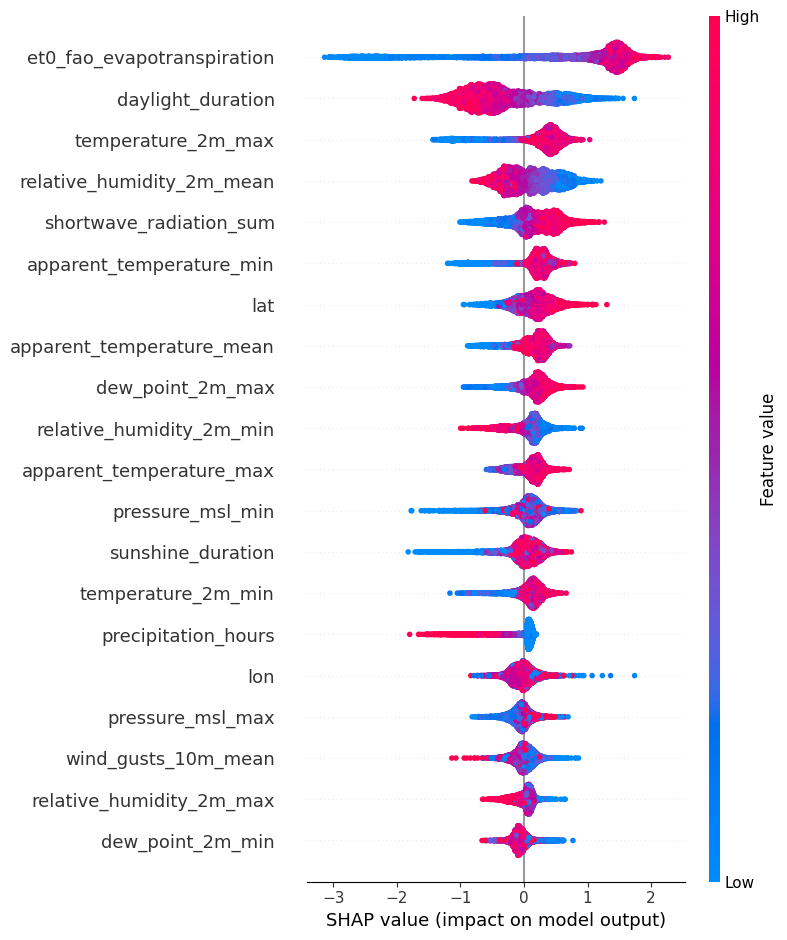

In [ ]:
import shap


explainer = shap.Explainer(model_xgb, X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.initjs()
shap.force_plot(shap_values[42])


##Анализ важности признаков с помощью SHAP

Наиболее важные признаки:
- et0_fao_evapotranspiration — самый важный признак:
  - Высокие значения (справа) значительно увеличивают вероятность "пожара". В целом, это логично - высокая испаряемость указывает на сухие погодные условия.

- daylight_duration (длительность светового дня):
  - Также важный фактор — длинный световой день коррелирует с повышенным риском возникновения пожаров, вероятно из-за большего количества солнечного тепла и времени на его накопление.

- temperature_2m_max (максимальная температура воздуха):
    - Высокая температура также способствует возгоранию.

- relative_humidity_2m_mean:
    - Более высокая влажность (розовые точки слева) уменьшает риск (отрицательные SHAP значения, что указывает на класс 0).
    - Низкая влажность (синие точки справа), в свою очередь, увеличивает вероятность пожара.

- shortwave_radiation_sum:
    - Повышенная солнечная радиация также вносит весомый вклад в рост вероятности пожара (розовые точки справа).

- lat и lon:
    - Географические координаты также имеют влияние — модель улавливает пространственные закономерности (например, определённые регионы более подвержены возгораниям).

- dew_point_2m_max:
    - Синие точки слева (низкие значения признака с отрицательным SHAP-вкладом) уменьшают вероятность пожара, высокие значения точки росы (розовые справа) увеличивают риск.

Модель адекватно выделяет метеоусловия, связанные с жарой, сухостью и продолжительностью дня как главные предикторы пожаров.
Особенно важны: испаряемость, температура, влажность, световой день, солнечная радиация.




По результатам видно улучшение метрик, далее попробуем найти Best F1 Threshold — тот, при котором F1-score максимален и Best Youden’s J (J = Sensitivity + Specificity - 1) — оптимум на ROC-кривой

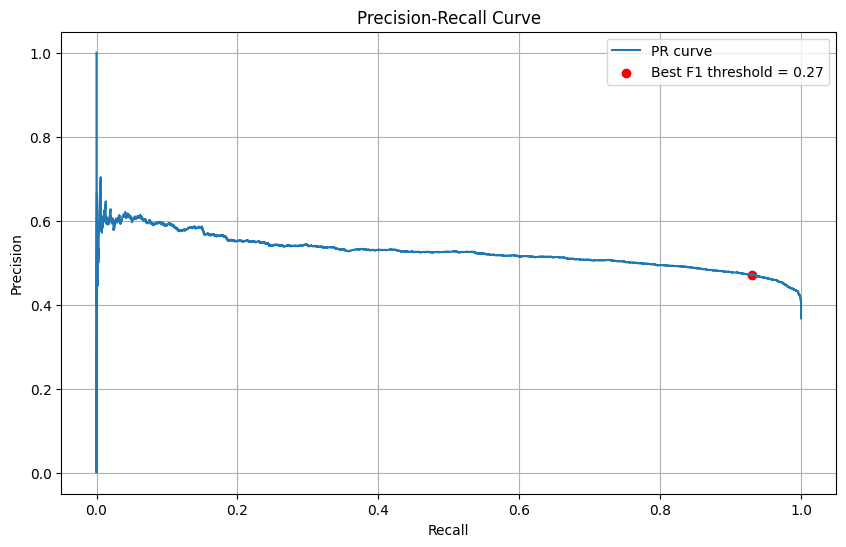

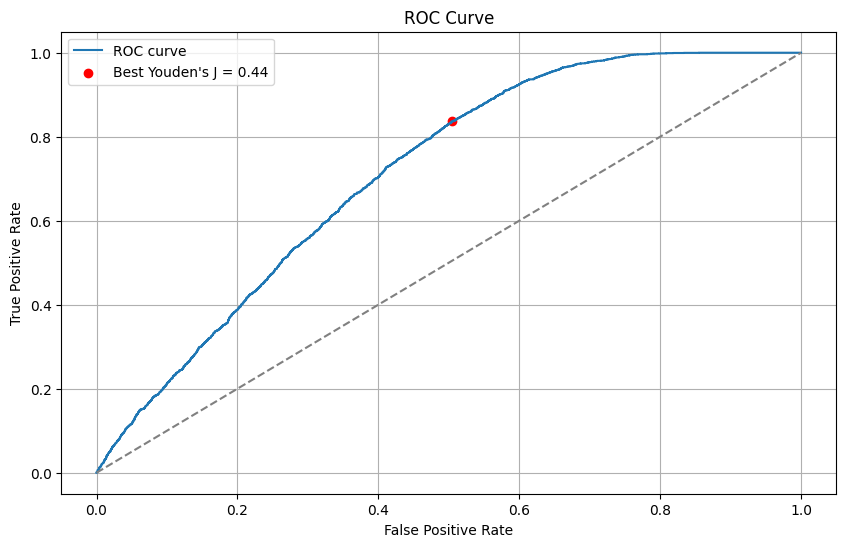

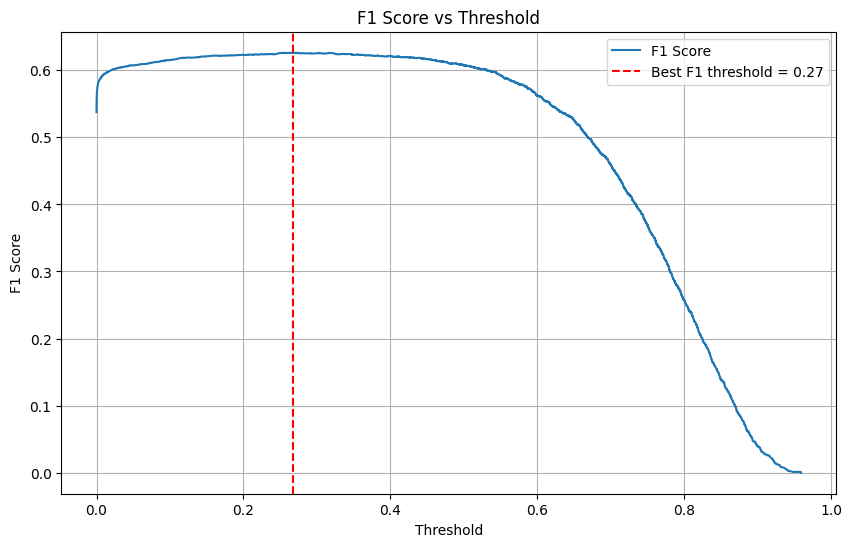

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

#PR-кривая
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, label="PR curve")
plt.scatter(recalls[best_f1_idx], precisions[best_f1_idx], color="red", label=f"Best F1 threshold = {best_f1_threshold:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

#ROC-кривая
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC curve")
plt.scatter(fpr[best_j_idx], tpr[best_j_idx], color="red", label=f"Best Youden's J = {best_j_threshold:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

#Лучший порог на F1-метрике
plt.figure(figsize=(10, 6))
plt.plot(thresholds_pr, f1_scores[:-1], label="F1 Score")
plt.axvline(best_f1_threshold, color='red', linestyle='--', label=f"Best F1 threshold = {best_f1_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

- Precision-Recall кривая демонстрирует компромисс между полнотой (recall) и точностью (precision). Точка с максимальной F1-мерой отмечена красным и находится в сбалансированной зоне между высокой точностью и полнотой.

- ROC-кривая показывает способность модели различать классы. Красная точка — это оптимальный порог по критерию Юдена (максимум TPR - FPR). Этот порог обеспечивает наилучший баланс, где нужны равные шансы на выявление обоих классов.

- График F1-меры от порога позволяет увидеть, как F1-мера меняется в зависимости от выбора порога. График помогает выбрать такой порог, при котором достигается максимальное гармоническое среднее между precision и recall

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, log_loss, roc_curve, precision_recall_curve

y_proba = model_xgb.predict_proba(X_test)[:, 1]

#Best F1 Threshold
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_f1_idx = f1_scores.argmax()
best_f1_threshold = thresholds_pr[best_f1_idx]

#Best Youden’s J Threshold
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
youden_j = tpr - fpr
best_j_idx = youden_j.argmax()
best_j_threshold = thresholds_roc[best_j_idx]

y_pred_f1 = (y_proba >= best_f1_threshold).astype(int)
y_pred_j = (y_proba >= best_j_threshold).astype(int)

print(f"Best F1 threshold: {best_f1_threshold:.3f}")
print(classification_report(y_test, y_pred_f1))
print("F1 Score:", f1_score(y_test, y_pred_f1))

print(f"Best Youden’s J threshold: {best_j_threshold:.3f}")
print(classification_report(y_test, y_pred_j))
print("F1 Score:", f1_score(y_test, y_pred_j))


Best F1 threshold: 0.268
              precision    recall  f1-score   support

           0       0.91      0.39      0.55      5507
           1       0.47      0.93      0.63      3201

    accuracy                           0.59      8708
   macro avg       0.69      0.66      0.59      8708
weighted avg       0.75      0.59      0.58      8708

F1 Score: 0.6261034047919294
Best Youden’s J threshold: 0.439
              precision    recall  f1-score   support

           0       0.84      0.49      0.62      5507
           1       0.49      0.84      0.62      3201

    accuracy                           0.62      8708
   macro avg       0.66      0.67      0.62      8708
weighted avg       0.71      0.62      0.62      8708

F1 Score: 0.6185638420688063


Как видно из таблиц выше, Recall для класса 1 повысился, в свою очередь также в дальнейшем можно попробовать повысить Precisoin, однако в задачах с несбалансированными классами часто возникает дилемма между точностью и полнотой. Увеличение Precision может привести к снижению Recall и наоборот. Это требует правильного выбора оптимального порога классификации в зависимости от бизнес-целей.

##Результаты

На протяжении всего процесса обучения модели и оптимизации гиперпараметров мы работали с задачей классификации на основе данных о погодных условиях. Исходя из анализа метрик, видно, как меняются результаты при различных порогах классификации, и насколько важны балансировка классов и настройка порогов для получения оптимальных результатов.

Для построения модели мы использовали XGBoost, который хорошо подходит для задач с большим числом признаков и может эффективно справляться с несбалансированными данными. В процессе обучения модели был добавлен параметр scale_pos_weight, который корректирует модель на несбалансированные классы (где один класс значительно больше другого). Гиперпараметры были выгружены по результатам тестовых обучений с помощью библиотеки pycaret.

После первоначального обучения с применением гиперпараметров, заданных для XGBoost, были получены следующие результаты:
- F1-Score: 0.60
- LogLoss: 0.63
- ROC-AUC: 0.71

Чтобы улучшить результаты, мы начали работать с выбором порога для классификации, провели оценку по различным порогам.

Используемый порог для классификации существенно влияет на метрики модели (точность, полноту, F1-меру и другие), особенно когда классы в задаче сильно несбалансированы. Например, если класс 1 встречается редко, модель может научиться предсказывать класс 0 в подавляющем большинстве случаев, что ухудшит метрики для класса 1 (например, recall и F1-score). Настройка порога помогает найти баланс между precision (точностью) и recall (полнотой), что позволяет улучшить результаты в зависимости от целей задачи.

##Best F1 Threshold
При использовании порога, который максимизирует F1-Score, модель пытается найти оптимальный компромисс между точностью (сколько из предсказанных положительных примеров действительно положительные) и полнотой (сколько из реальных положительных примеров модель правильно классифицирует).

При пороге **0.268** мы получили **F1-Score: 0.63**. Это относительно хороший компромисс, когда точность и полнота находятся на приемлемом уровне, но без значительных перекосов в сторону одного из классов.

##Best Youden’s J Threshold
Youden’s J statistic — это метрика, которая пытается максимизировать разницу между sensitivity (recall) и false positive rate (FPR). Она рассчитывается как:

`J = sensitivity + specificity - 1`

Gри пороге **0.439** мы получили **F1-Score: 0.62**. Это порог, который обеспечивает хороший компромисс между recall и FPR.

Порог, оптимизированный с использованием Youden’s J, может быть полезен в случае, когда мы хотим добиться хорошей производительности на обоих классах (положительном и отрицательном).

##Выводы по выбору порога
- F1-Score используется, когда нужно добиться хорошего компромисса между precision и recall. Этот порог подходит, когда важен сбалансированный подход и нужно учитывать оба класса на равных.

- Youden’s J statistic оптимизирует модель для уменьшения как ложных положительных, так и ложных отрицательных. Этот порог полезен, если задача заключается в том, чтобы минимизировать ошибки классификации и достичь наилучшего различия между классами.

Таким образом, выбор порога зависит от того, какая метрика наиболее важна для задачи. Если важнее точность и минимизация ложных положительных срабатываний — выбираем порог для precision. Если нужно сбалансировать оба класса — работаем с F1-Score. Для улучшения различимости классов стоит обратиться к Youden’s J statistic.

##Общие выводы
Проблема с несбалансированными классами остаётся одной из ключевых в задачах прогнозирования, и подход с выбором оптимального порога для классификации представляет собой мощный инструмент для гибкой настройки модели в зависимости от специфики задачи. В контексте анализа рисков и прогнозирования таких событий, как лесные пожары, выбор подходящего порога критичен для достижения требуемых метрик, соответствующих целям бизнеса и требованиям заказчиков.

В зависимости от конкретных бизнес-целей, таких как минимизация ложных тревог или максимизация полноты обнаружения, модель может быть настроена на использование различных порогов, что влияет на итоговые метрики.

Таким образом, выбор оптимального порога и настройка модели напрямую связаны с конкретными целями и требованиями бизнеса.

Далее будет расписан ход обучения сверточной сети для определения пожаров по спутниковым снимкам. Исходный датасет взят тут - [https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset/data](https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset/data)

Исходный датасет уже разделен на train, valid и test выборки, что упрощает подготовку.

In [ ]:
!pip install -q kaggle imbalanced-learn scikit-learn pandas matplotlib seaborn torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset
!unzip wildfire-prediction-dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: valid/nowildfire/-73.465183,45.443641.jpg  
  inflating: valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: valid/nowildfire/-73.480722,45.518864.jpg  
  inflating: valid/nowildfire/-73.481149,45.563113.jpg  
  inflating: valid/nowildfire/-73.481422,45.559789.jpg  
  inflating: valid/nowildfire/-73.481565,45.467244.jpg  
  inflating: valid/nowildfire/-73.483407,45.637554.jpg  
  inflating: valid/now

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


#CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_dir = '/content/'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')
batch_size = 64
image_size = 32
num_classes = 2


train_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

test_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])



train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)



class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn = nn.BatchNorm2d(64)

        self.flatten_dim = 64 * (image_size // 2) * (image_size // 2)
        self.fc1 = nn.Linear(self.flatten_dim, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn(x)
        x = x.view(-1, self.flatten_dim)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel().to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)


def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total


epochs = 10
for epoch in range(epochs):
    loss = train(model, train_loader, optimizer, criterion)
    val_acc = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f} - Val Acc: {val_acc:.4f}")


test_acc = evaluate(model, test_loader)
print(f"Final Test Accuracy: {test_acc:.4f}")

Using device: cuda
Epoch 1/10 - Loss: 0.2257 - Val Acc: 0.9368
Epoch 2/10 - Loss: 0.1750 - Val Acc: 0.9383
Epoch 3/10 - Loss: 0.1512 - Val Acc: 0.9529
Epoch 4/10 - Loss: 0.1388 - Val Acc: 0.9463
Epoch 5/10 - Loss: 0.1291 - Val Acc: 0.9562
Epoch 6/10 - Loss: 0.1191 - Val Acc: 0.9524
Epoch 7/10 - Loss: 0.1130 - Val Acc: 0.9522
Epoch 8/10 - Loss: 0.1011 - Val Acc: 0.9389
Epoch 9/10 - Loss: 0.0925 - Val Acc: 0.9540
Epoch 10/10 - Loss: 0.0869 - Val Acc: 0.9529
Final Test Accuracy: 0.9606


In [ ]:
from sklearn.metrics import classification_report

def get_all_preds_and_labels(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    return all_preds, all_labels

preds, labels = get_all_preds_and_labels(model, test_loader)

print("Classification Report:")
print(classification_report(labels, preds, target_names=test_dataset.classes))

Classification Report:
              precision    recall  f1-score   support

  nowildfire       0.95      0.96      0.96      2820
    wildfire       0.97      0.96      0.96      3480

    accuracy                           0.96      6300
   macro avg       0.96      0.96      0.96      6300
weighted avg       0.96      0.96      0.96      6300



In [ ]:
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F
import torch


uploaded = files.upload()
img_path = next(iter(uploaded))
img = Image.open(img_path).convert('RGB')


transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

input_tensor = transform(img).unsqueeze(0).to(device)


model.eval()
with torch.no_grad():
    output = model(input_tensor)
    probs = F.softmax(output, dim=1)
    confidence, pred_class = torch.max(probs, 1)

class_names = train_dataset.classes
predicted_label = class_names[pred_class.item()]
confidence_pct = confidence.item() * 100

print(f"{predicted_label} ({confidence_pct:.2f}%)")

Saving -60.73875,50.24761.jpg to -60.73875,50.24761 (3).jpg
wildfire (96.62%)


In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.2
astropy-iers-data==0.2025.5.12.0.38.29
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.4.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.10.0
click==8.2.0
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet